In [1]:
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib 
import itertools
import numpy 

%matplotlib inline

In [2]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_surf(sequence,weigths):
    tot_score = 0
    n_resi = 0.0
#    core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
#    surf_positions = [7,9,11,13,15,21,23,25,27,29,31,36,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205] 
    if weigths == "TMB14_16":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205]
    elif weigths == "TMB12_12":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,99,105,107,109,111,113,115,119,121,123,125,127,133,135,137,139,141,143,147,149,151,153,155,161,163,165,167,169,171]
    elif weigths == "TMB12_14":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177]
    elif weigths == "TMB12_16":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,151,155,157,159,161,163,165,171,173,175,177,179,181,183]
    elif weigths == "TMB12_18":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,79,81,83,85,87,89,93,95,97,99,101,107,109,111,113,115,117,119,123,125,127,129,131,137,139,141,143,145,147,151,153,155,157,159,165,167,169,171,173,175,177]
    elif weigths == "TMB12_16_sym":
        surf_positions = [1,3,5,7,9,15,17,19,21,23,25,29,31,33,35,37,43,45,47,49,51,53,55,59,61,63,65,67,69,75,77,79,81,83,85,87]
    elif weights == 'TMB16_20_sym':
        surf_positions = [1, 3, 5, 7, 9, 15, 17, 19, 21, 23, 25, 29, 31, 33, 35, 37, 43, 45, 47, 49, 51, 53, 55]

    for pos in surf_positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1.0
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [3]:
def aa_distribution_surf(sequence,weigths):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0.0
#    core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
#    surf_positions = [7,9,11,13,15,21,23,25,27,29,31,36,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205] 
    if weigths == "TMB14_16":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205]
    elif weigths == "TMB12_12":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,99,105,107,109,111,113,115,119,121,123,125,127,133,135,137,139,141,143,147,149,151,153,155,161,163,165,167,169,171]
    elif weigths == "TMB12_14":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177]
    elif weigths == "TMB12_16":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,151,155,157,159,161,163,165,171,173,175,177,179,181,183]
    elif weigths == "TMB12_18":
        surf_positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,79,81,83,85,87,89,93,95,97,99,101,107,109,111,113,115,117,119,123,125,127,129,131,137,139,141,143,145,147,151,153,155,157,159,165,167,169,171,173,175,177]
    elif weigths == "TMB12_16_sym":
        surf_positions = [1,3,5,7,9,15,17,19,21,23,25,29,31,33,35,37,43,45,47,49,51,53,55,59,61,63,65,67,69,75,77,79,81,83,85,87]
    elif weights == 'TMB16_20_sym':
        surf_positions = [1, 3, 5, 7, 9, 15, 17, 19, 21, 23, 25, 29, 31, 33, 35, 37, 43, 45, 47, 49, 51, 53, 55]

    for pos in surf_positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1.0
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
    return(aa_dict)

In [4]:
aa_dict_native = {'A': 0.11646988801217442, 'C': 0.0007932593546261532, 'D': 0.010411406461582812, 'E': 0.004490887322852635, 'F': 0.0855641505604294, 'G': 0.07599110843531799, 'H': 0.019509865734235562, 'I': 0.0707706970582727, 'K': 0.01096541330381245, 'L': 0.1828232384788639, 'M': 0.019677538601529845, 'N': 0.01652901476011504, 'P': 0.029547685280969717, 'Q': 0.015129779779828855, 'R': 0.015298433190206727, 'S': 0.027118880062911643, 'T': 0.04331156854535453, 'V': 0.12188444691977099, 'W': 0.046709150330001774, 'Y': 0.08700358780714286}

#aa_dict_native = {'A': 0.05415794077883519, 'C': 0.0001325451316173157, 'D': 0.05312408875222013, 'E': 0.11335259655912838, 'F': 0.012856877766879623, 'G': 0.11351165071706916, 'H': 0.0076611086074808476, 'I': 0.013890729793494684, 'K': 0.10020411950269066, 'L': 0.018185192057895712, 'M': 0.0071839461336585106, 'N': 0.06120934178087639, 'P': 0.005725949685868038, 'Q': 0.05102987567266654, 'R': 0.14754924051639584, 'S': 0.07997773241788829, 'T': 0.07875831720700899, 'V': 0.026800625613021233, 'W': 0.014182329083052779, 'Y': 0.040505792222251674}

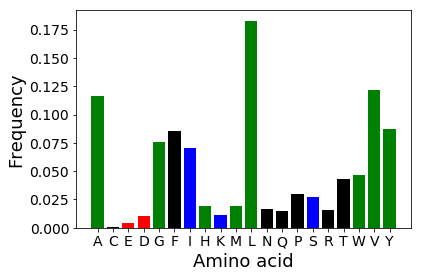

In [5]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_native)), list(aa_dict_native.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_native)), list(aa_dict_native.keys()),size=14)
plt.yticks(size=14)
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
plt.show()

In [5]:
data = pd.DataFrame()

for fasta_f in glob.glob("ref2015*/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weights = 'TMB16_20_sym'
            wts = fasta_f.split("/")[0]
            distr = aa_distribution_surf(seq,weights)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            G = distr['G']
            I = distr['I']
            L = distr['L']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_surf(seq,weights)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, G, I, L, dstr_r, wts, weights]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","density_G","density_I","density_L","correlation_native_aa","weights","designs"])
    df = df.T
    data= pd.concat([data,df])
print(data)

                                                   hydropathy density_F  \
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...        1.2         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...        1.2         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...   0.965217         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...    1.18696         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...        1.2         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...    1.11304         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...    1.18696         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...   0.991304         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...   0.991304         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...        1.2         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...        1.2         0   
ref2015_GA7b_fasol055/42_input_0044_tetramer_CD...    1.18696         0   
ref2015_GA7b_fasol055/42_

In [58]:
# data = pd.DataFrame()

# for folder in glob.glob("ref2015*/"):
#     d = {}
#     fasta_f = folder + folder[:-1] + ".fasta"
#     with open(fasta_f, "r") as in_f:
#         for line1,line2 in itertools.zip_longest(*[in_f]*2):
#             pdb_name = line1[1:].strip()
#             seq = line2.strip()
#             distr = aa_distribution_surf(seq)
#             F = distr['F']
#             aro = distr['F'] + distr['Y'] + distr['W']
#             hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
#             beta_branch = distr['V'] + distr['I'] + distr['L']
#             S = distr['S']
#             T = distr['T']
#             A = distr['A']
#             V = distr['V']
#             positive = distr['D'] + distr['E']
#             negative = distr['K'] + distr['L'] + distr['H']
#             ST = distr['S'] + distr['T']
#             G = distr['G']
#             GRAVY = GRAVY_surf(seq)
#             keys = set(distr.keys())
#             dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
#             d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r, folder[:-1]]
#     df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
#     df = df.T
#     data = pd.concat([data,df])
# print(data)

In [ ]:
# data = pd.DataFrame()

# for fasta_f in glob.glob("TMB14_16/*.ss3_simp"):
#     d = {}
# #    fasta_f = folder + folder[:-1] + ".fasta"
#     with open(fasta_f, "r") as in_f:
#         for line in in_f:
#             if line.startswith('>'):
#                 pdb_name = line[1:].strip()
#                 seq = next(in_f).strip()
#             else:
#                 pass
#             weigths = "TMB14_16"
#             distr = aa_distribution_surf(seq,weigths)
#             F = distr['F']
#             aro = distr['F'] + distr['Y'] + distr['W']
#             hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
#             beta_branch = distr['V'] + distr['I'] + distr['L']
#             S = distr['S']
#             T = distr['T']
#             A = distr['A']
#             V = distr['V']
#             positive = distr['D'] + distr['E']
#             negative = distr['K'] + distr['L'] + distr['H']
#             ST = distr['S'] + distr['T']
#             G = distr['G']
#             GRAVY = GRAVY_surf(seq,weigths)
#             keys = set(distr.keys())
#             dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
#             d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r, weigths]
#     df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
#     df = df.T
#     data = pd.concat([data,df])
# print(data)

In [10]:
# for fasta_f in glob.glob("TMB12_12/*.ss3_simp"):
#     d = {}
# #    fasta_f = folder + folder[:-1] + ".fasta"
#     with open(fasta_f, "r") as in_f:
#         for line in in_f:
#             if line.startswith('>'):
#                 pdb_name = line[1:].strip()
#                 seq = next(in_f).strip()
#             else:
#                 pass
#             weigths = "TMB12_12"
#             distr = aa_distribution_surf(seq,weigths)
#             F = distr['F']
#             aro = distr['F'] + distr['Y'] + distr['W']
#             hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
#             beta_branch = distr['V'] + distr['I'] + distr['L']
#             S = distr['S']
#             T = distr['T']
#             A = distr['A']
#             V = distr['V']
#             positive = distr['D'] + distr['E']
#             negative = distr['K'] + distr['L'] + distr['H']
#             ST = distr['S'] + distr['T']
#             G = distr['G']
#             GRAVY = GRAVY_surf(seq,weigths)
#             keys = set(distr.keys())
#             dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
#             d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r,weigths]
#     df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
#     df = df.T
#     data = pd.concat([data,df])
# print(data)

In [11]:
# for fasta_f in glob.glob("TMB12_14/*.ss3_simp"):
#     d = {}
# #    fasta_f = folder + folder[:-1] + ".fasta"
#     with open(fasta_f, "r") as in_f:
#         for line in in_f:
#             if line.startswith('>'):
#                 pdb_name = line[1:].strip()
#                 seq = next(in_f).strip()
#             else:
#                 pass
#             weigths = "TMB12_14"
#             distr = aa_distribution_surf(seq,weigths)
#             F = distr['F']
#             aro = distr['F'] + distr['Y'] + distr['W']
#             hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
#             beta_branch = distr['V'] + distr['I'] + distr['L']
#             S = distr['S']
#             T = distr['T']
#             A = distr['A']
#             V = distr['V']
#             positive = distr['D'] + distr['E']
#             negative = distr['K'] + distr['L'] + distr['H']
#             ST = distr['S'] + distr['T']
#             G = distr['G']
#             GRAVY = GRAVY_surf(seq,weigths)
#             keys = set(distr.keys())
#             dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
#             d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r,weigths]
#     df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
#     df = df.T
#     data = pd.concat([data,df])
# print(data)

In [12]:
# for fasta_f in glob.glob("TMB12_16/*.ss3_simp"):
#     d = {}
# #    fasta_f = folder + folder[:-1] + ".fasta"
#     with open(fasta_f, "r") as in_f:
#         for line in in_f:
#             if line.startswith('>'):
#                 pdb_name = line[1:].strip()
#                 seq = next(in_f).strip()
#             else:
#                 pass
#             weigths = "TMB12_16"
#             distr = aa_distribution_surf(seq,weigths)
#             F = distr['F']
#             aro = distr['F'] + distr['Y'] + distr['W']
#             hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
#             beta_branch = distr['V'] + distr['I'] + distr['L']
#             S = distr['S']
#             T = distr['T']
#             A = distr['A']
#             V = distr['V']
#             positive = distr['D'] + distr['E']
#             negative = distr['K'] + distr['L'] + distr['H']
#             ST = distr['S'] + distr['T']
#             G = distr['G']
#             GRAVY = GRAVY_surf(seq,weigths)
#             keys = set(distr.keys())
#             dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
#             d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r,weigths]
#     df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
#     df = df.T
#     data = pd.concat([data,df])
# print(data)

In [13]:
# for fasta_f in glob.glob("TMB12_18/*.ss3_simp"):
#     d = {}
# #    fasta_f = folder + folder[:-1] + ".fasta"
#     with open(fasta_f, "r") as in_f:
#         for line in in_f:
#             if line.startswith('>'):
#                 pdb_name = line[1:].strip()
#                 seq = next(in_f).strip()
#             else:
#                 pass
#             weigths = "TMB12_18"
#             distr = aa_distribution_surf(seq,weigths)
#             F = distr['F']
#             aro = distr['F'] + distr['Y'] + distr['W']
#             hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
#             beta_branch = distr['V'] + distr['I'] + distr['L']
#             S = distr['S']
#             T = distr['T']
#             A = distr['A']
#             V = distr['V']
#             positive = distr['D'] + distr['E']
#             negative = distr['K'] + distr['L'] + distr['H']
#             ST = distr['S'] + distr['T']
#             G = distr['G']
#             GRAVY = GRAVY_surf(seq,weigths)
#             keys = set(distr.keys())
#             dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
#             d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r,weigths]
#     df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
#     df = df.T
#     data = pd.concat([data,df])
# print(data)

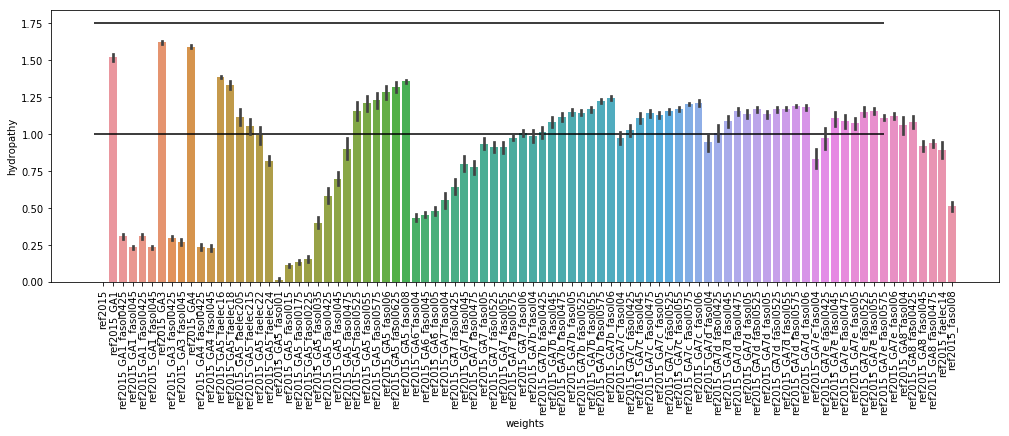

In [6]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(1.0, -1, 80)
plt.hlines(1.75, -1, 80)


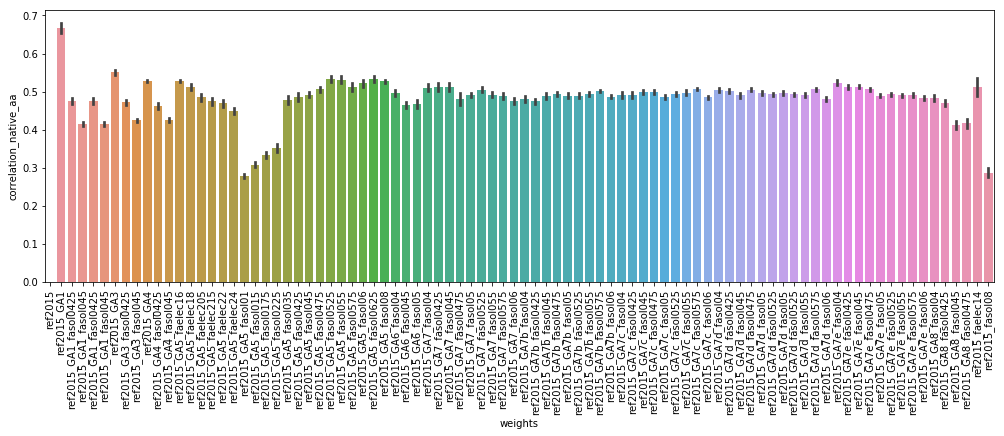

In [7]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])


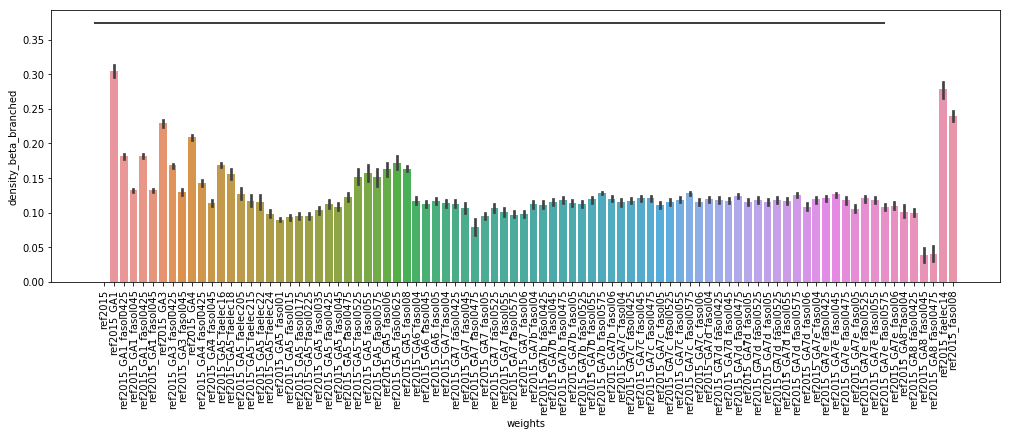

In [8]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_beta_branched", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.374, -1, 80)


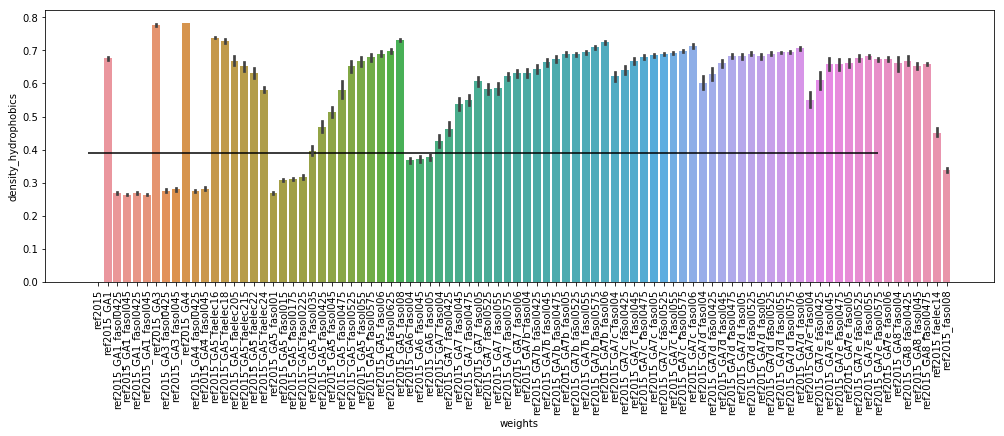

In [9]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.391, -1, 80)

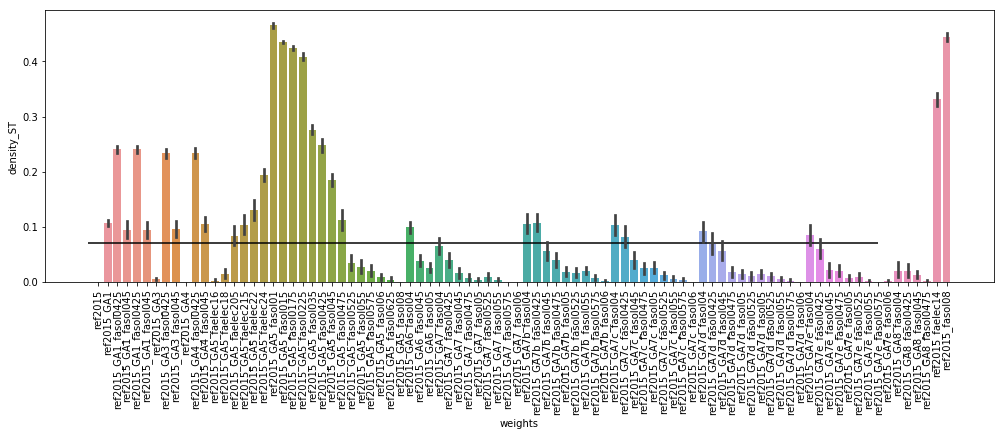

In [10]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.07, -1, 80)

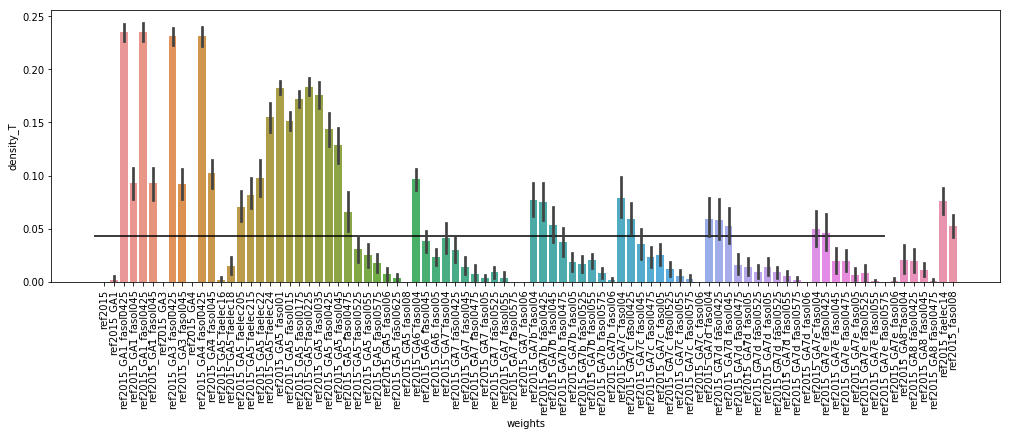

In [11]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.043, -1, 80)

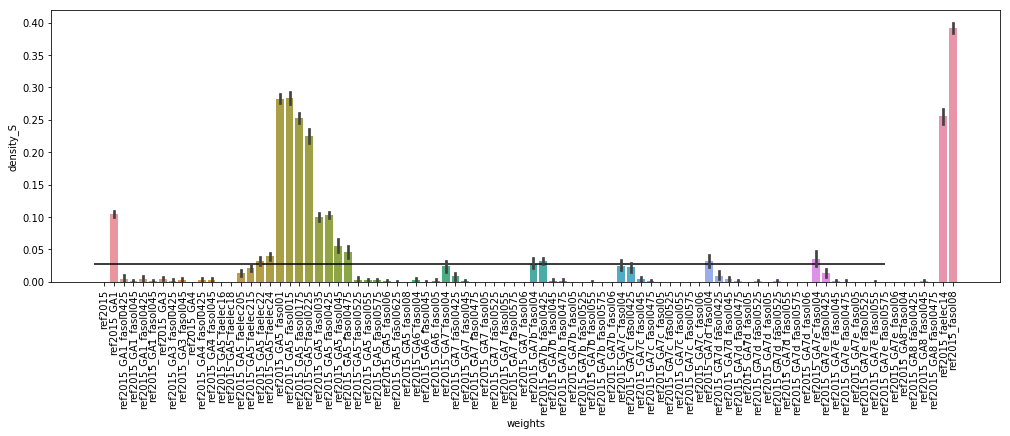

In [12]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.027, -1, 80)

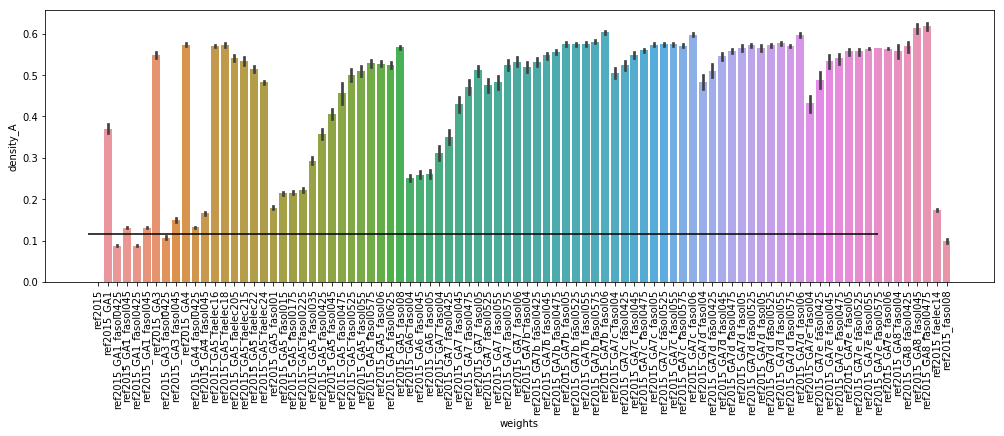

In [13]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.116, -1, 80)

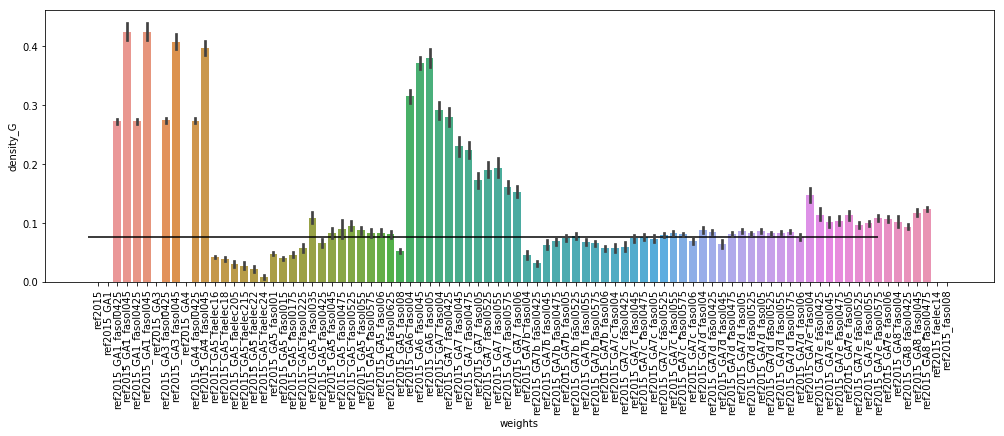

In [14]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_G", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.076, -1, 80)

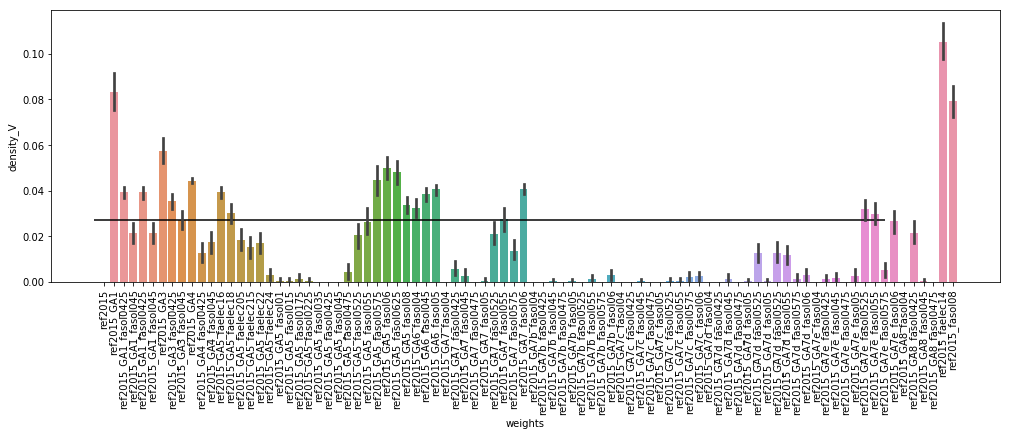

In [15]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.027, -1, 80)

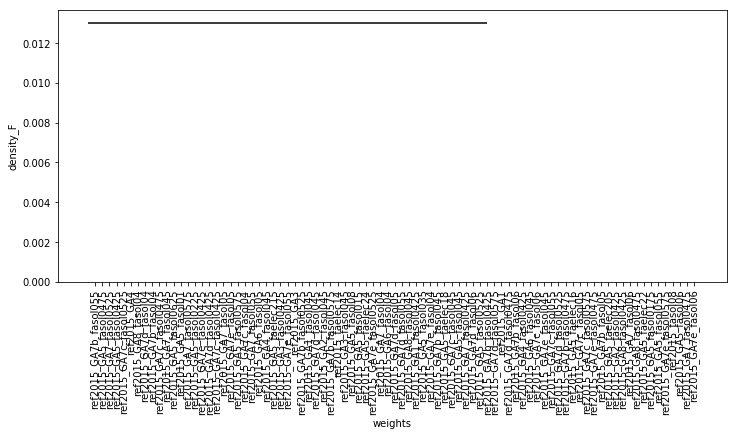

In [16]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_F", data=data)
plt.hlines(0.013, -1, 55)

DONE

In [49]:
data_t = pd.DataFrame()

for fasta_f in glob.glob("ref2015*/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            des = "TMB12_16_sym"
            weights = fasta_f.split("/")[0]
            distr = aa_distribution_surf(seq,des)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            G = distr['G']
            I = distr['I']
            L = distr['L']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_surf(seq,des)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, G, I, L, dstr_r, weights, des]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","density_G","density_I","density_L","correlation_native_aa","weights","designs"])
    df = df.T
    data_t = pd.concat([data_t,df])
print(data_t)

                                                   hydropathy density_F  \
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.68611         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_input_0092_AB_0003_1_00...    1.76667         0   
ref2015_GA7b_fasol055/0_i

In [62]:
data = pd.DataFrame()

for fasta_f in glob.glob("../*_input_*/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weigths = "TMB12_16_sym"
            distr = aa_distribution_surf(seq,weigths)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            G = distr['G']
            GRAVY = GRAVY_surf(seq,weigths)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r, weigths]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

                                                   hydropathy density_F  \
24_input_0091_BA_0005_1_0005_0010_0007/24_input...       1.25         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.71944         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.51389         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.19444         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.38889         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.19444         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.17778         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.45833         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.45833         0   
24_input_0091_BA_0005_1_0005_0010_0007/24_input...    1.45833         0   
18_input_0043_AB_0005_1_0008_0002_0005/18_input...   0.552778         0   
18_input_0043_AB_0005_1_0008_0002_0005/18_input...   0.463889         0   
18_input_0043_AB_0005_1_0

In [77]:
data4 = pd.DataFrame()

for fasta_f in glob.glob("../../round4/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weigths = "TMB12_16_sym"
            distr = aa_distribution_surf(seq,weigths)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            G = distr['G']
            GRAVY = GRAVY_surf(seq,weigths)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, G, S, T, A, V, dstr_r, weigths]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_G","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
    df = df.T
    data4 = pd.concat([data4,df])
print(data4)

                                             hydropathy density_F density_aro  \
4_input_0033_AB_0003_1_0003_0004_0003_0009     0.994444         0    0.194444   
5_input_0088_BA_0002_1_0003_0005_0006_0009      1.27778         0    0.194444   
88_input_0055_BA_0004_1_0006_0008_0004_0002       1.375         0    0.194444   
27_input_0011_AB_0005_2_0004_0010_0010_0009     1.36944         0    0.194444   
101_input_0035_AB_0004_1_0003_0009_0001_0002    1.26111         0    0.194444   
28_input_0008_BA_0005_2_0005_0010_0001_0007     1.28889         0    0.194444   
44_input_0009_AB_0003_2_0004_0003_0004_0008    0.708333         0    0.194444   
64_input_0062_BA_0005_1_0007_0005_0008_0005     1.08889         0    0.194444   
64_input_0062_BA_0005_1_0007_0003_0002_0003    0.783333         0    0.194444   
101_input_0035_AB_0004_1_0003_0008_0009_0001    1.51389         0    0.194444   
6_input_0091_AB_0001_1_0004_0001_0004_0009      1.38611         0    0.194444   
35_input_0069_BA_0002_2_0005

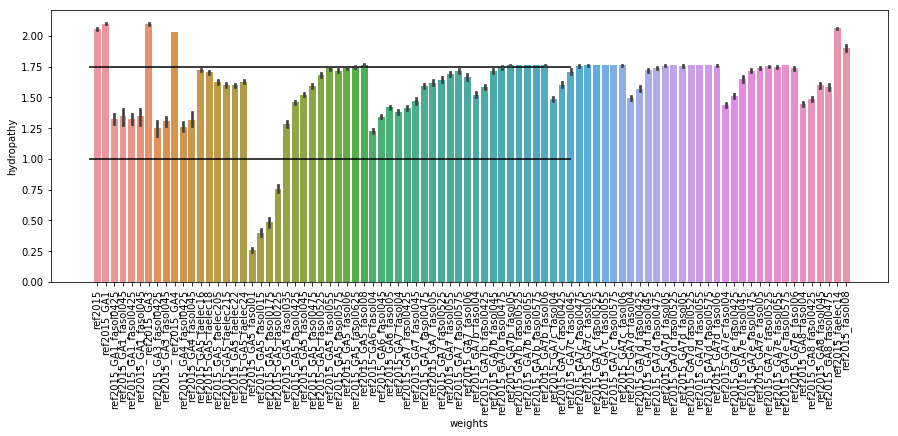

In [50]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(1.0, -1, 55)
plt.hlines(1.75, -1, 55)


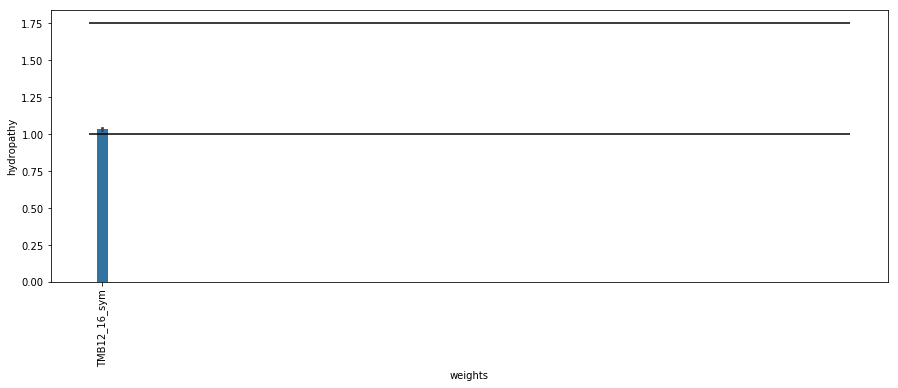

In [64]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data)
plt.hlines(1.0, -1, 55)
plt.hlines(1.75, -1, 55)


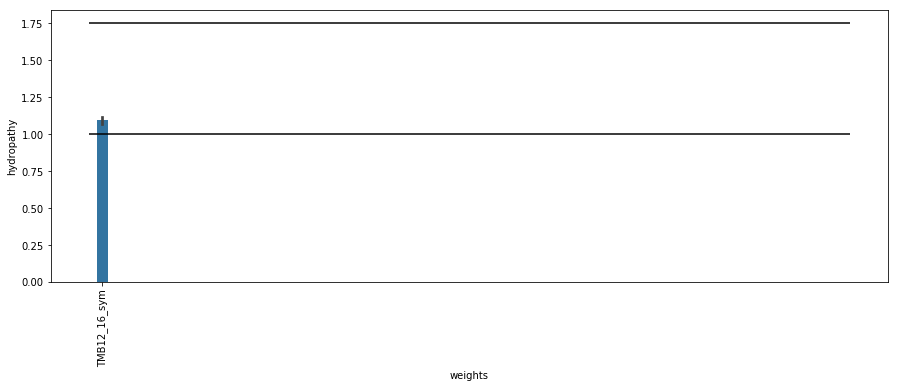

In [78]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data4)
plt.hlines(1.0, -1, 55)
plt.hlines(1.75, -1, 55)


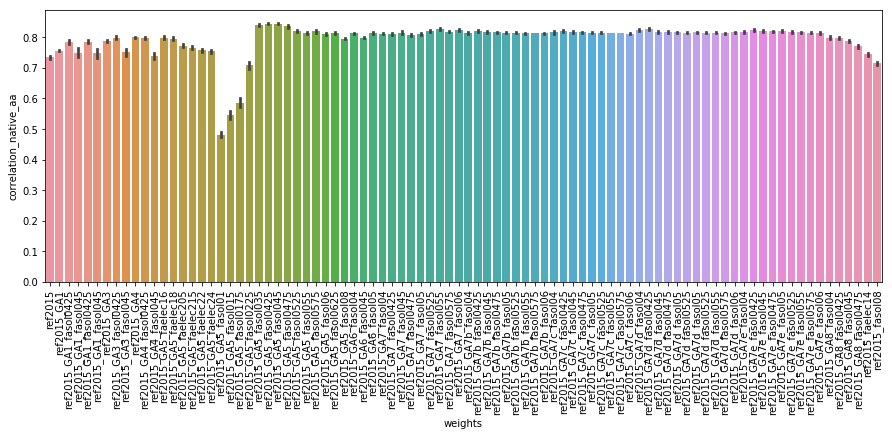

In [51]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])


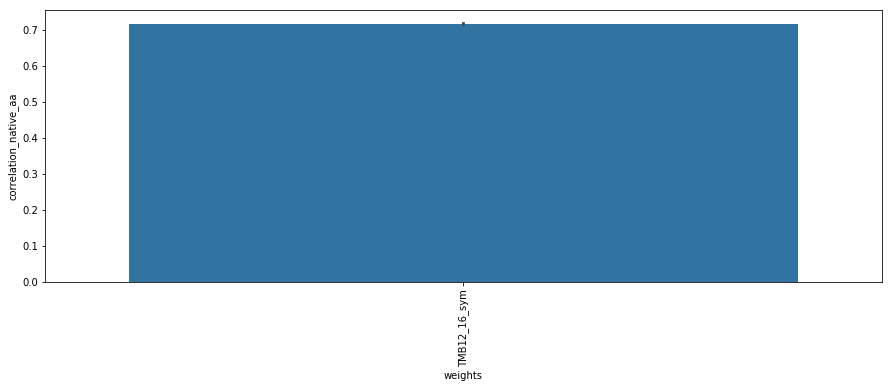

In [65]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data)


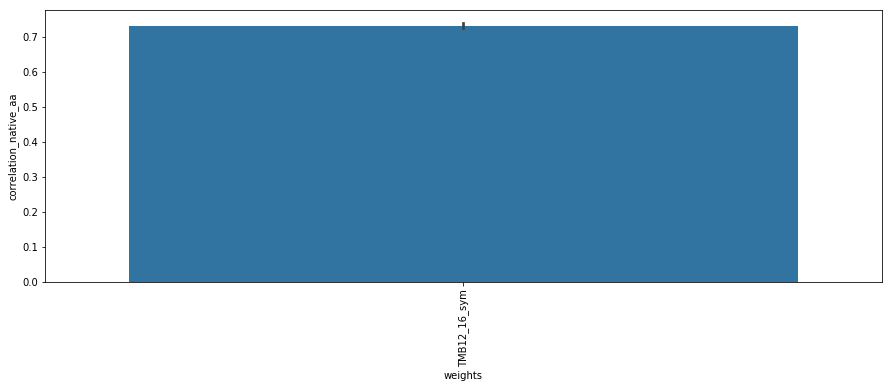

In [79]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data4)


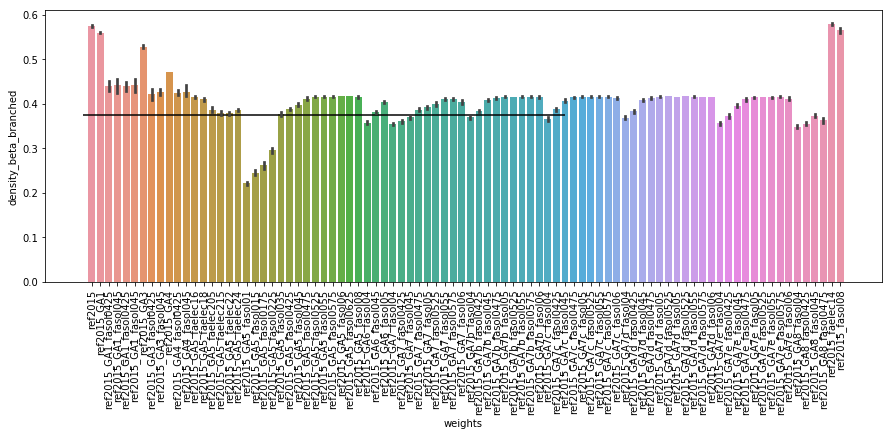

In [52]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_beta_branched", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.374, -1, 55)


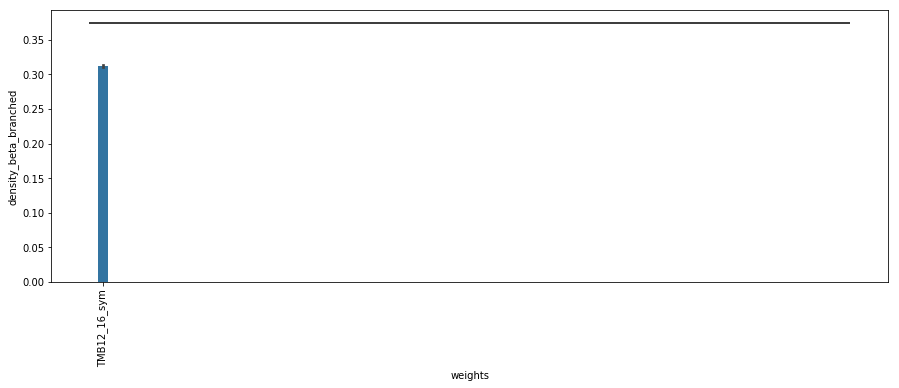

In [66]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_beta_branched", data=data)
plt.hlines(0.374, -1, 55)

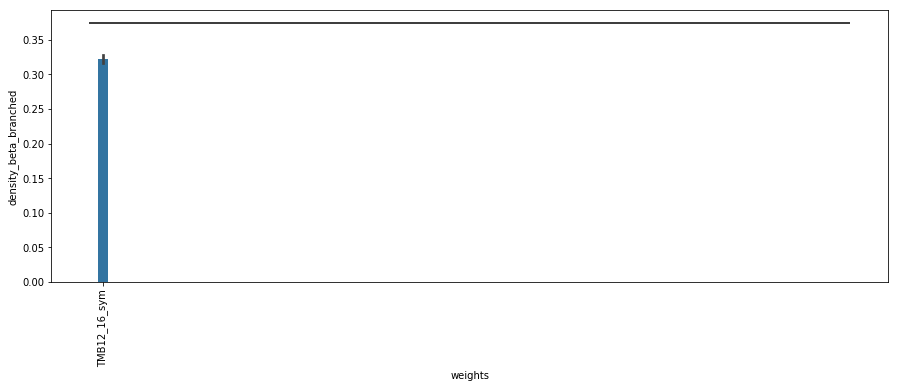

In [80]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_beta_branched", data=data4)
plt.hlines(0.374, -1, 55)

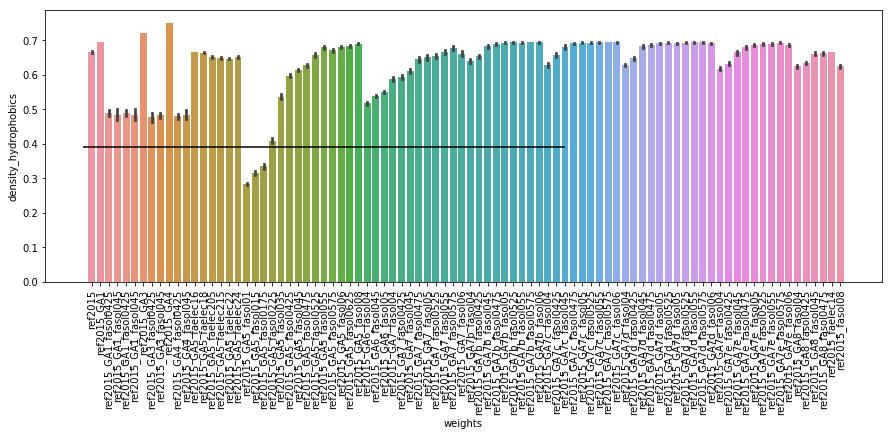

In [53]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.391, -1, 55)

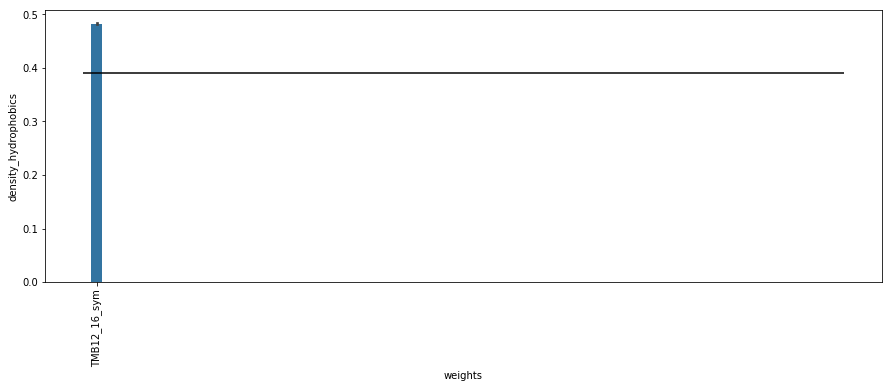

In [67]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data)
plt.hlines(0.391, -1, 55)

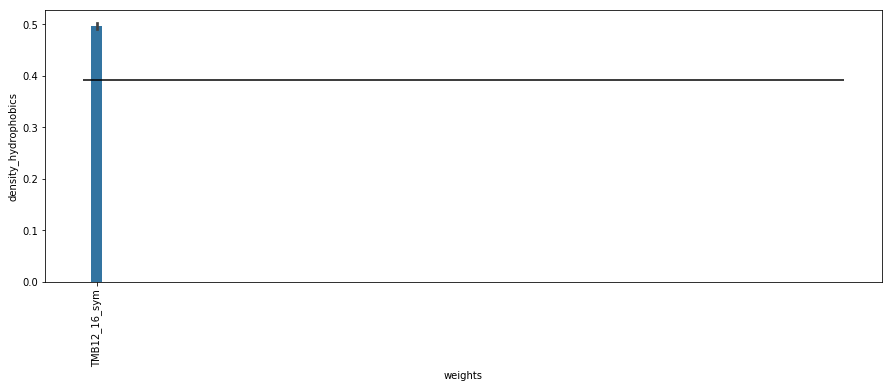

In [81]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data4)
plt.hlines(0.391, -1, 55)

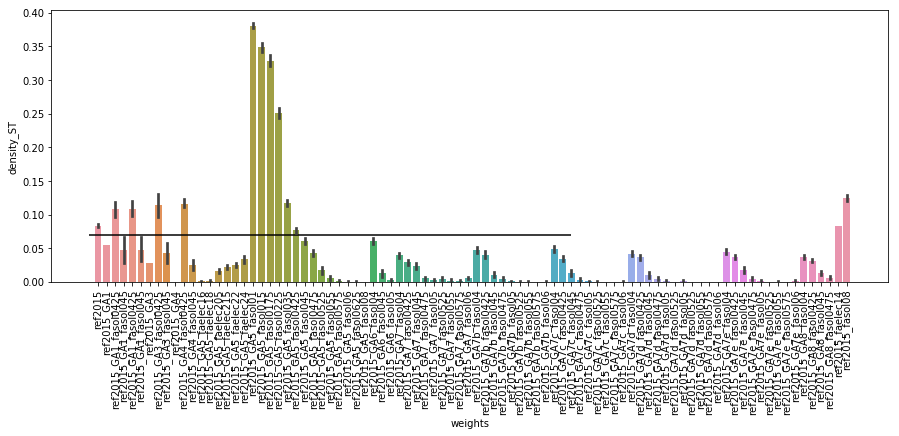

In [54]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.07, -1, 55)

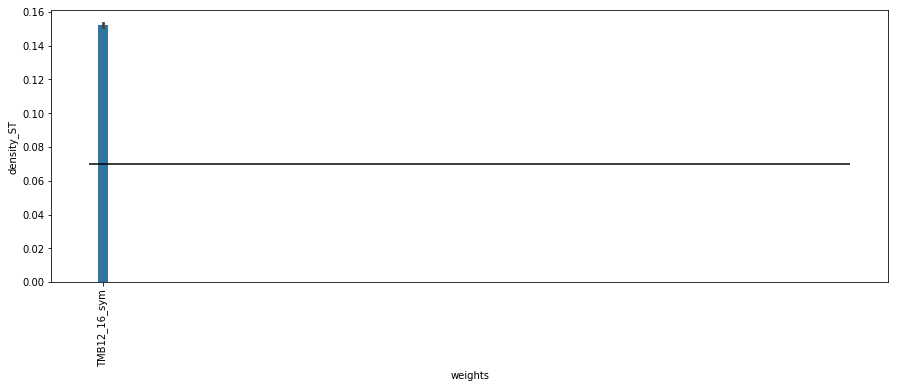

In [68]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data)
plt.hlines(0.07, -1, 55)

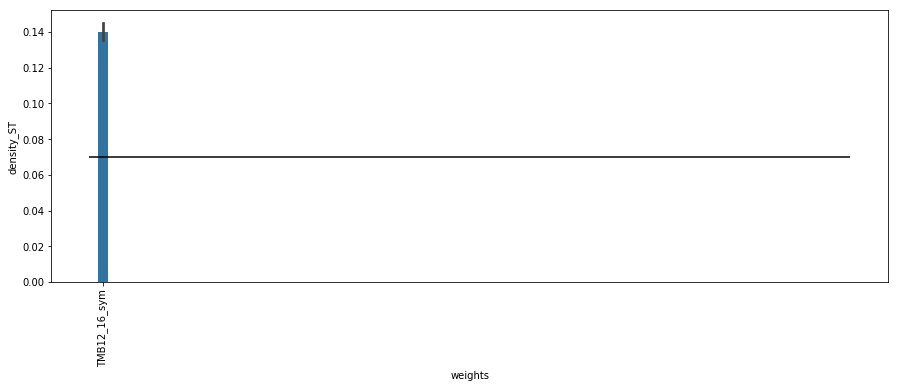

In [82]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data4)
plt.hlines(0.07, -1, 55)

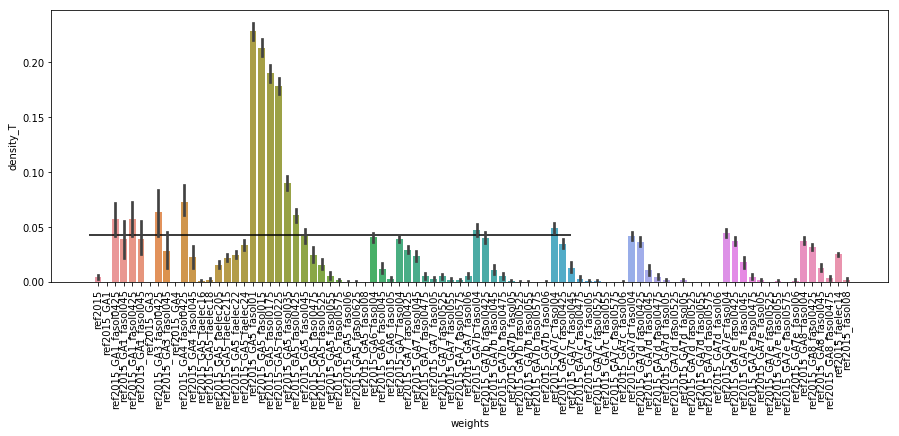

In [55]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.043, -1, 55)

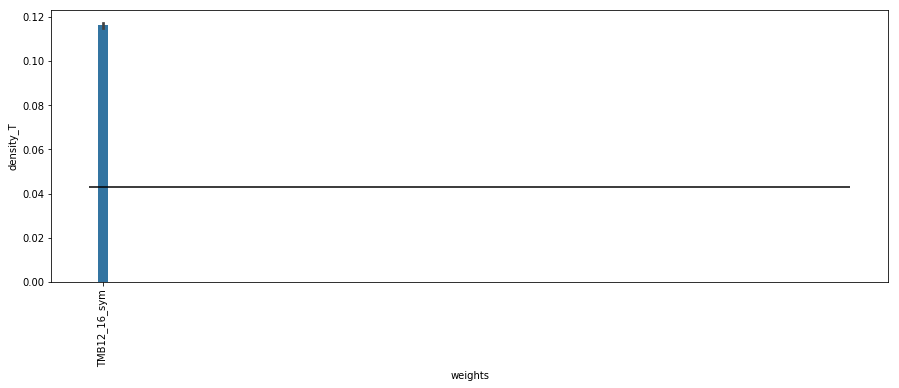

In [69]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data)
plt.hlines(0.043, -1, 55)

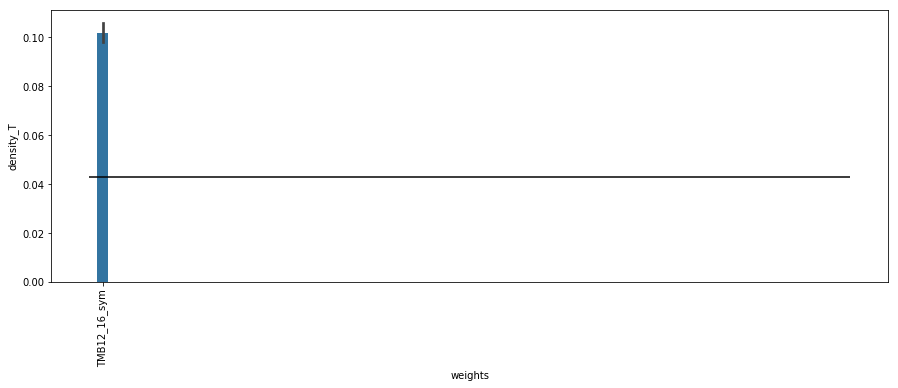

In [83]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data4)
plt.hlines(0.043, -1, 55)

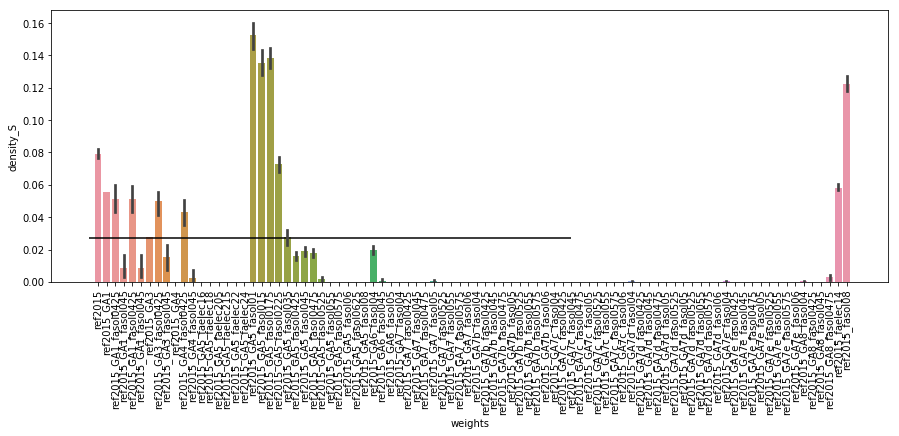

In [56]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.027, -1, 55)

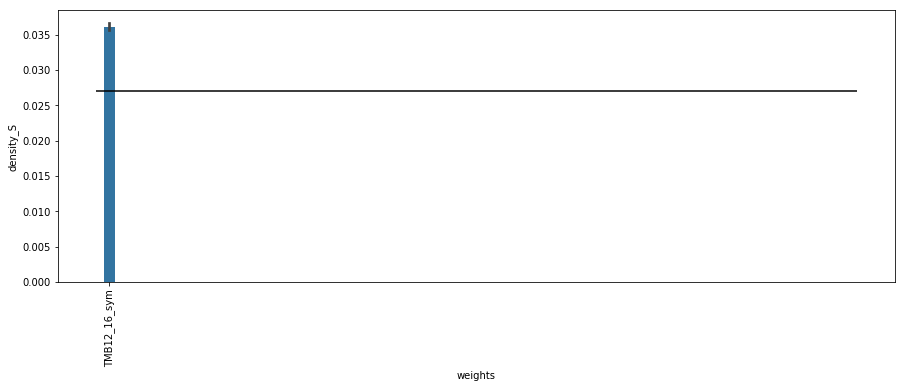

In [70]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data)
plt.hlines(0.027, -1, 55)

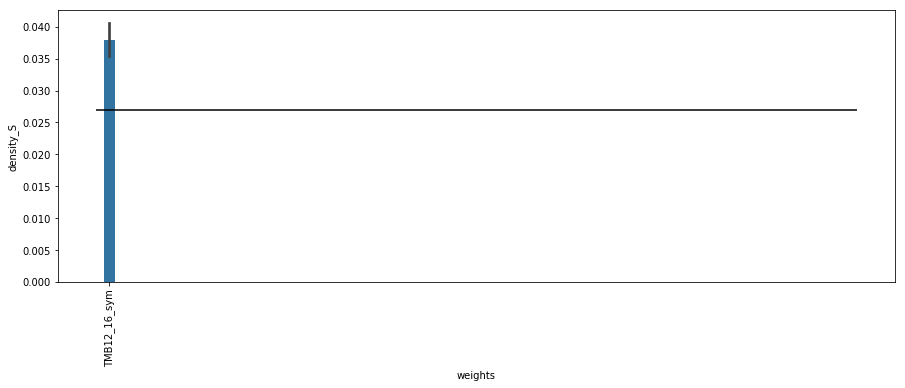

In [85]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data4)
plt.hlines(0.027, -1, 55)

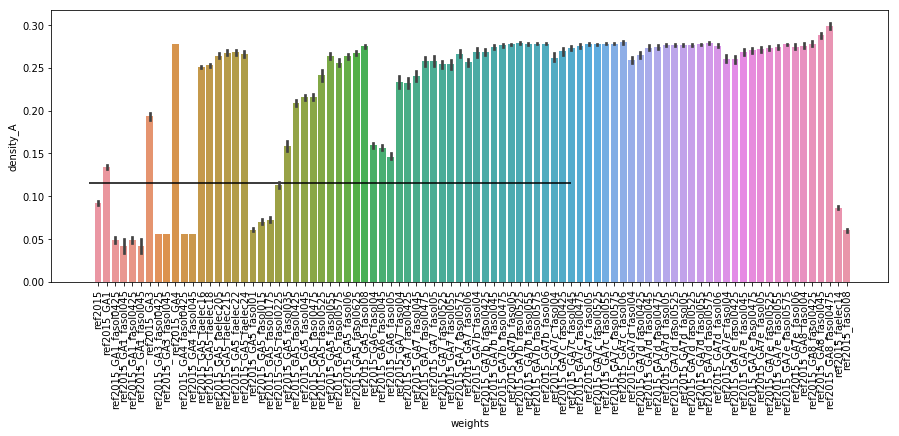

In [57]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.116, -1, 55)

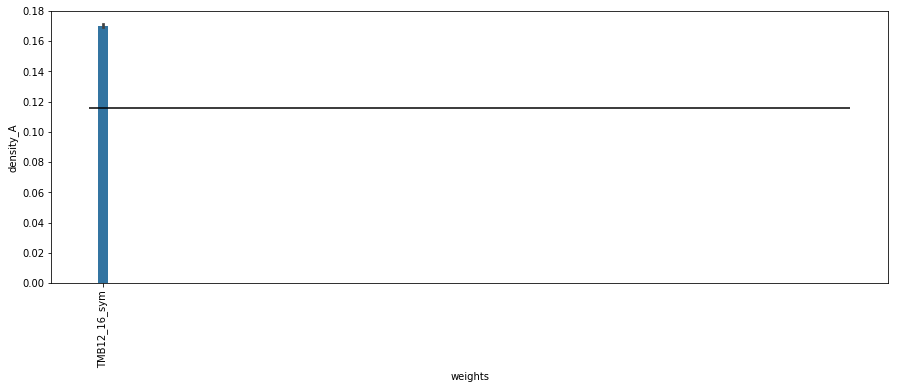

In [71]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data)
plt.hlines(0.116, -1, 55)

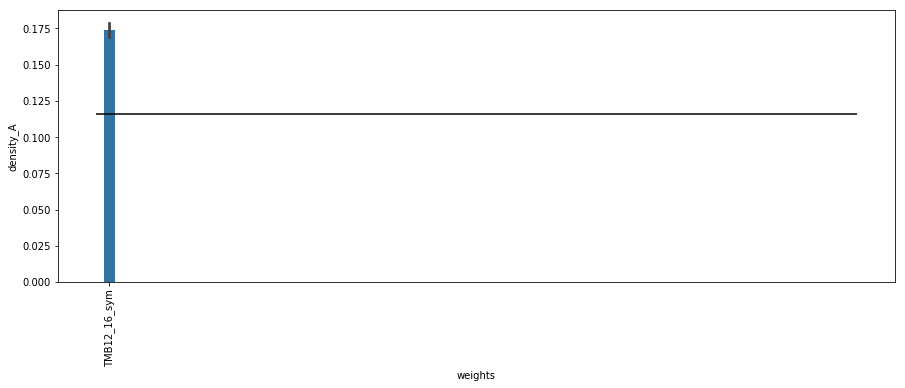

In [86]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data4)
plt.hlines(0.116, -1, 55)

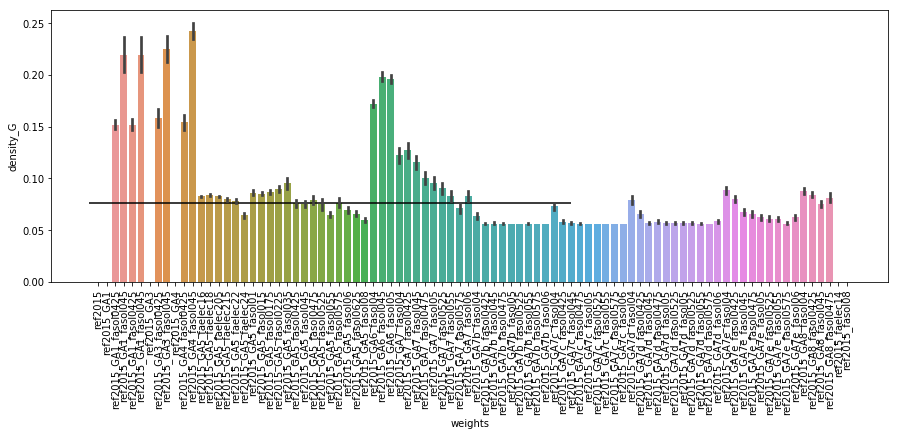

In [58]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_G", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.076, -1, 55)


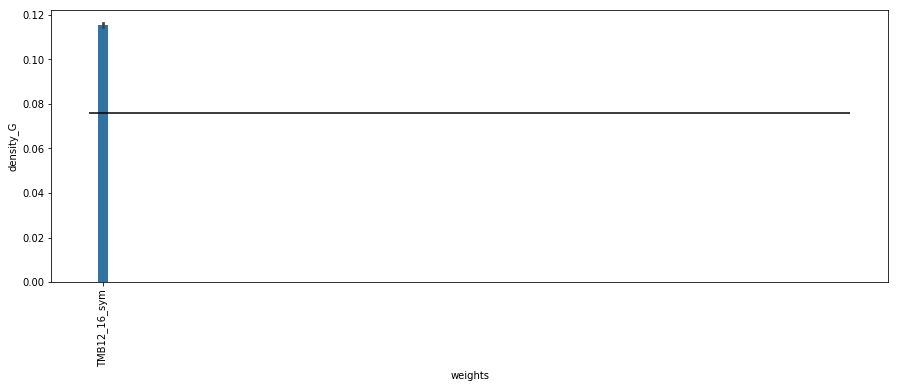

In [72]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_G", data=data)
plt.hlines(0.076, -1, 55)

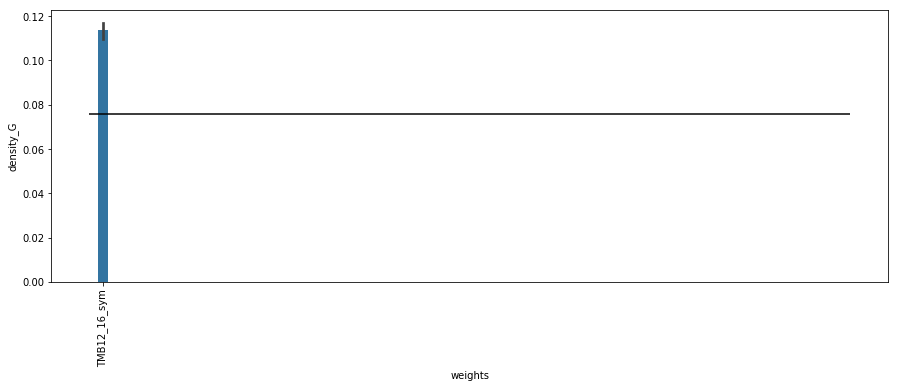

In [87]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_G", data=data4)
plt.hlines(0.076, -1, 55)

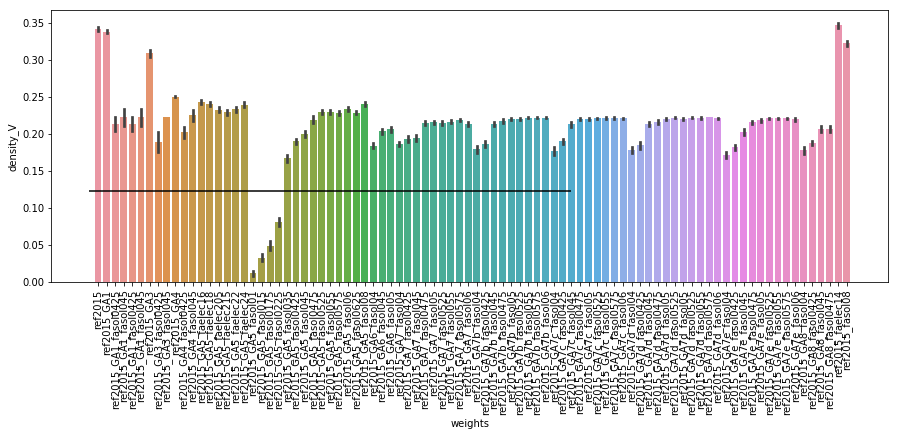

In [59]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.123, -1, 55)


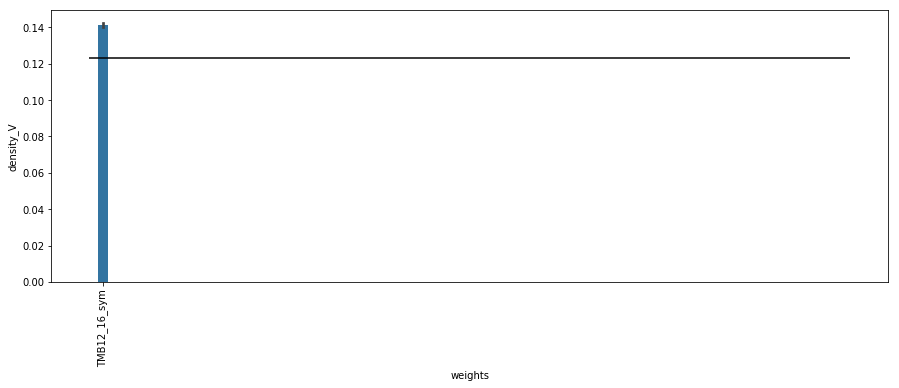

In [73]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data)
plt.hlines(0.123, -1, 55)

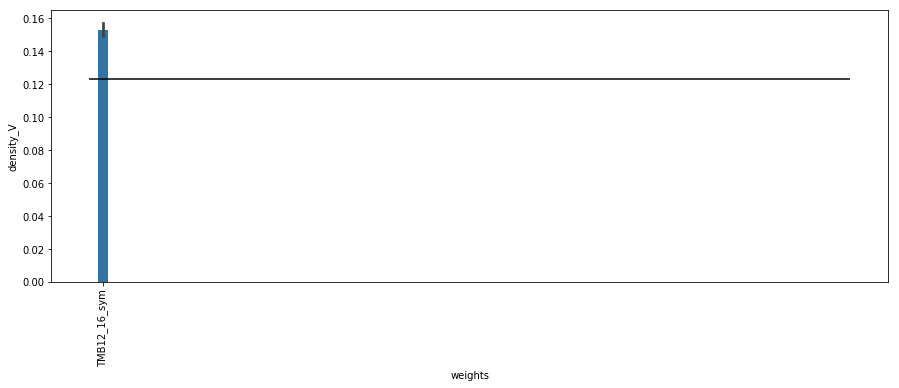

In [88]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data4)
plt.hlines(0.123, -1, 55)

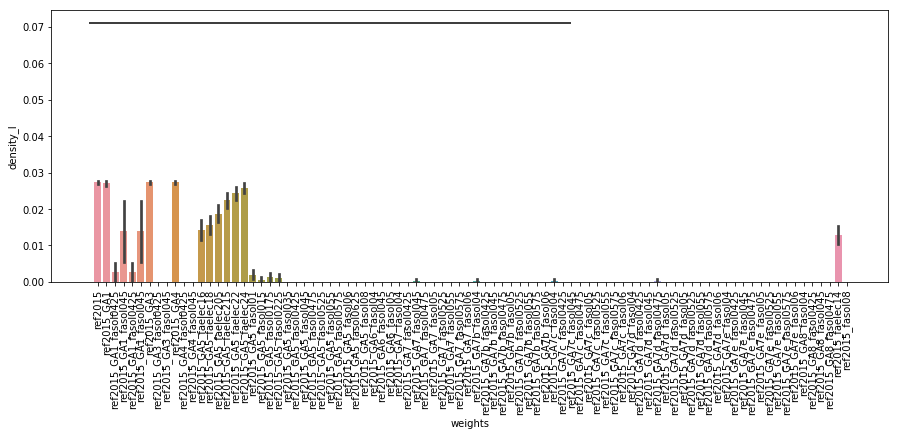

In [60]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_I", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.071, -1, 55)


ValueError: Could not interpret input 'density_I'

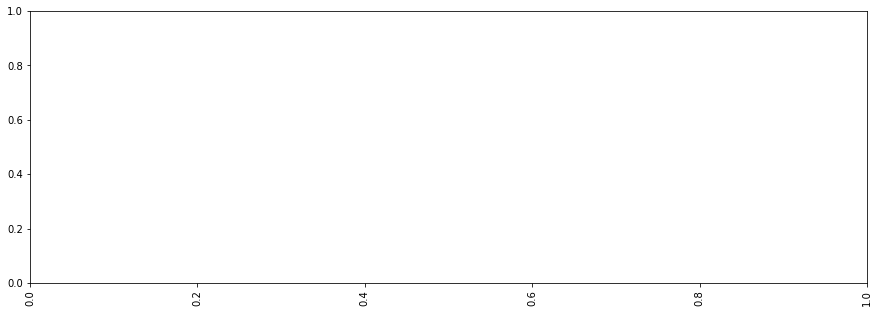

In [74]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_I", data=data)
plt.hlines(0.071, -1, 55)

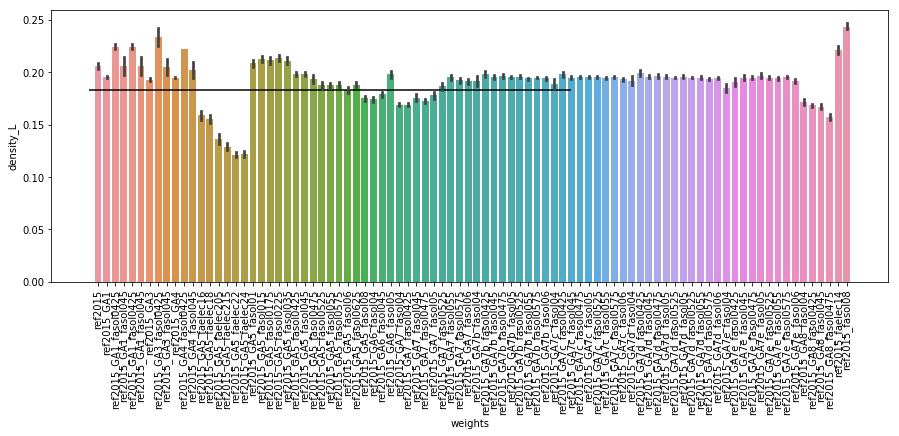

In [61]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_L", data=data_t, order=["ref2015","ref2015_GA1","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA1_fasol0425","ref2015_GA1_fasol045","ref2015_GA3","ref2015_GA3_fasol0425","ref2015_GA3_fasol045","ref2015_GA4","ref2015_GA4_fasol0425","ref2015_GA4_fasol045","ref2015_GA5_faelec16","ref2015_GA5_faelec18","ref2015_GA5_faelec205","ref2015_GA5_faelec215","ref2015_GA5_faelec22","ref2015_GA5_faelec24","ref2015_GA5_fasol01","ref2015_GA5_fasol015","ref2015_GA5_fasol0175","ref2015_GA5_fasol0225","ref2015_GA5_fasol035","ref2015_GA5_fasol0425","ref2015_GA5_fasol045","ref2015_GA5_fasol0475","ref2015_GA5_fasol0525","ref2015_GA5_fasol055","ref2015_GA5_fasol0575","ref2015_GA5_fasol06","ref2015_GA5_fasol0625","ref2015_GA5_fasol08","ref2015_GA6_fasol04","ref2015_GA6_fasol045","ref2015_GA6_fasol05","ref2015_GA7_fasol04","ref2015_GA7_fasol0425","ref2015_GA7_fasol045","ref2015_GA7_fasol0475","ref2015_GA7_fasol05","ref2015_GA7_fasol0525","ref2015_GA7_fasol055","ref2015_GA7_fasol0575","ref2015_GA7_fasol06","ref2015_GA7b_fasol04","ref2015_GA7b_fasol0425","ref2015_GA7b_fasol045","ref2015_GA7b_fasol0475","ref2015_GA7b_fasol05","ref2015_GA7b_fasol0525","ref2015_GA7b_fasol055","ref2015_GA7b_fasol0575","ref2015_GA7b_fasol06","ref2015_GA7c_fasol04","ref2015_GA7c_fasol0425","ref2015_GA7c_fasol045","ref2015_GA7c_fasol0475","ref2015_GA7c_fasol05","ref2015_GA7c_fasol0525","ref2015_GA7c_fasol055","ref2015_GA7c_fasol0575","ref2015_GA7c_fasol06","ref2015_GA7d_fasol04","ref2015_GA7d_fasol0425","ref2015_GA7d_fasol045","ref2015_GA7d_fasol0475","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol05","ref2015_GA7d_fasol0525","ref2015_GA7d_fasol055","ref2015_GA7d_fasol0575","ref2015_GA7d_fasol06","ref2015_GA7e_fasol04","ref2015_GA7e_fasol0425","ref2015_GA7e_fasol045","ref2015_GA7e_fasol0475","ref2015_GA7e_fasol05","ref2015_GA7e_fasol0525","ref2015_GA7e_fasol055","ref2015_GA7e_fasol0575","ref2015_GA7e_fasol06","ref2015_GA8_fasol04","ref2015_GA8_fasol0425","ref2015_GA8_fasol045","ref2015_GA8_fasol0475","ref2015_faelec14","ref2015_fasol08"])
plt.hlines(0.183, -1, 55)


ValueError: Could not interpret input 'density_L'

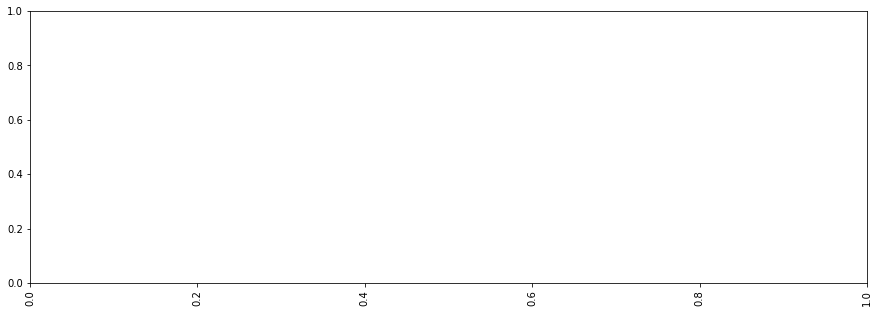

In [75]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_L", data=data)
plt.hlines(0.183, -1, 55)


In [7]:
aa_dict_native = {'A': 0.05415794077883519, 'C': 0.0001325451316173157, 'D': 0.05312408875222013, 'E': 0.11335259655912838, 'F': 0.012856877766879623, 'G': 0.11351165071706916, 'H': 0.0076611086074808476, 'I': 0.013890729793494684, 'K': 0.10020411950269066, 'L': 0.018185192057895712, 'M': 0.0071839461336585106, 'N': 0.06120934178087639, 'P': 0.005725949685868038, 'Q': 0.05102987567266654, 'R': 0.14754924051639584, 'S': 0.07997773241788829, 'T': 0.07875831720700899, 'V': 0.026800625613021233, 'W': 0.014182329083052779, 'Y': 0.040505792222251674}


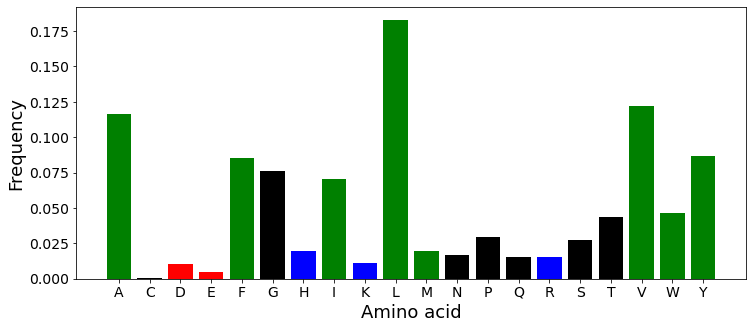

In [20]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_native)), list(aa_dict_native.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_native)), list(aa_dict_native.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

Text(0, 0.5, 'Frequency')

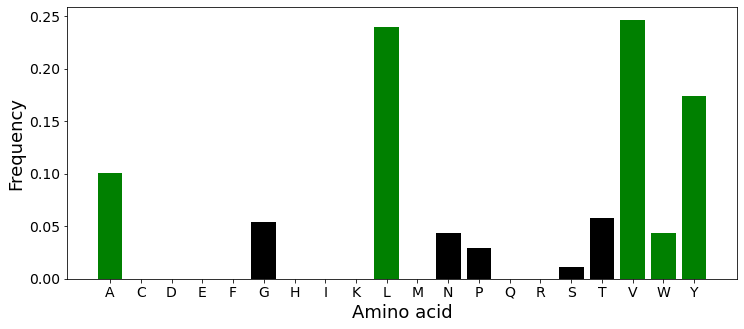

In [21]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_GA7_fasol0425_ST/ref2015_GA7_fasol0425_ST.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_surf(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)

Text(0, 0.5, 'Frequency')

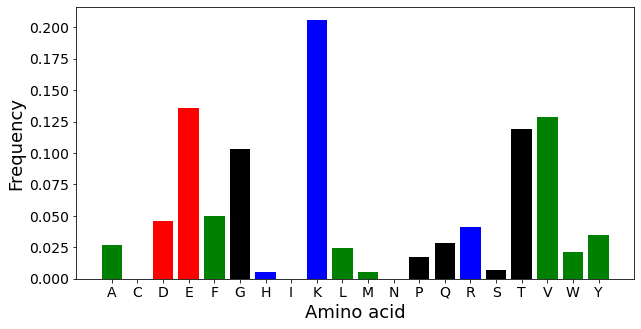

In [35]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec15/ref2015_faelec15.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items())) 
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)

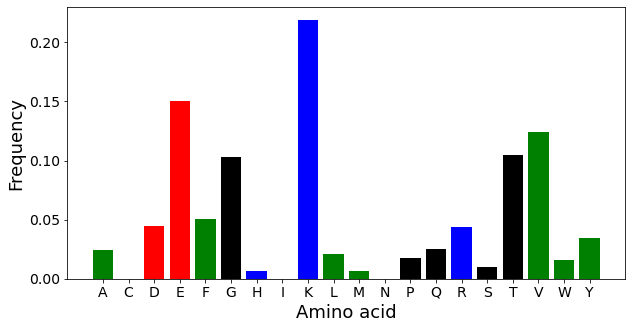

In [36]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec155/ref2015_faelec155.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

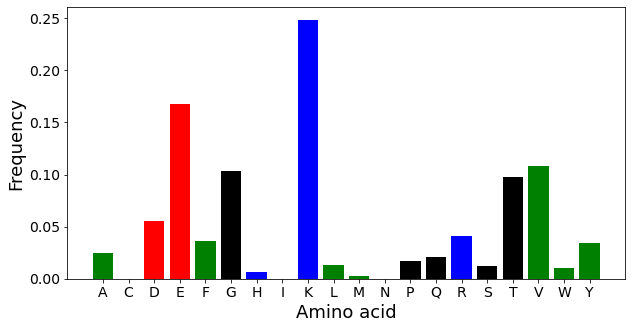

In [37]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec16/ref2015_faelec16.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

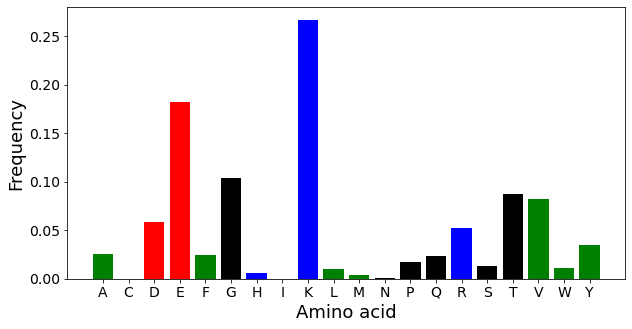

In [38]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec165/ref2015_faelec165.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

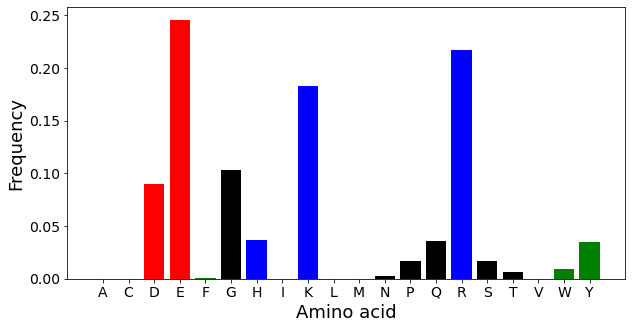

In [39]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_fasol02/ref2015_fasol02.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

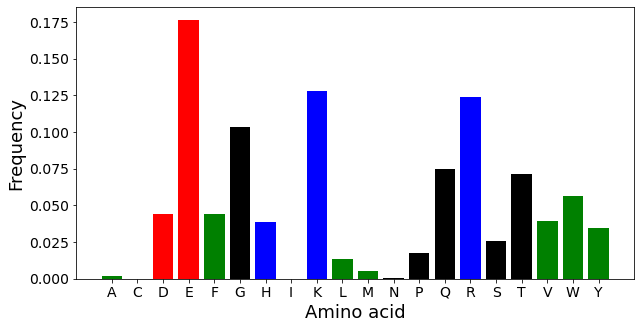

In [40]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_fasol06/ref2015_fasol06.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

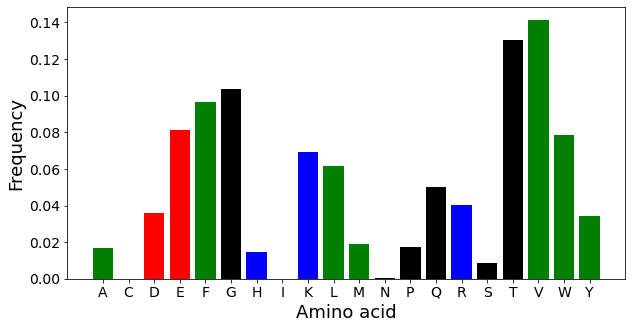

In [41]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_fasol08/ref2015_fasol08.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

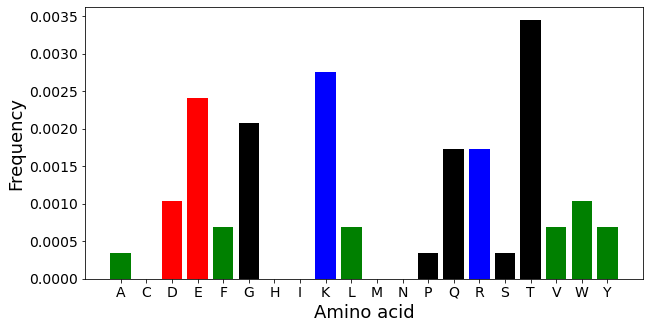

In [86]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09/ref2015_faelec14_fasol09.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        d = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

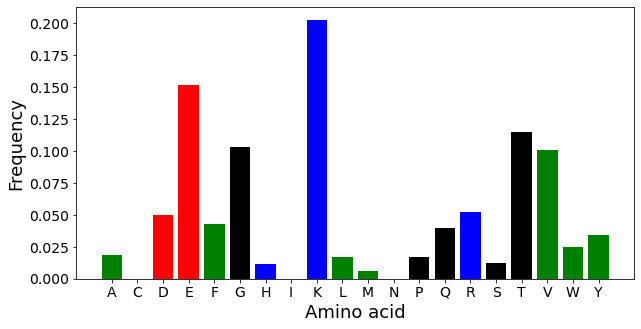

In [87]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A1/ref2015_faelec14_fasol09_A1.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

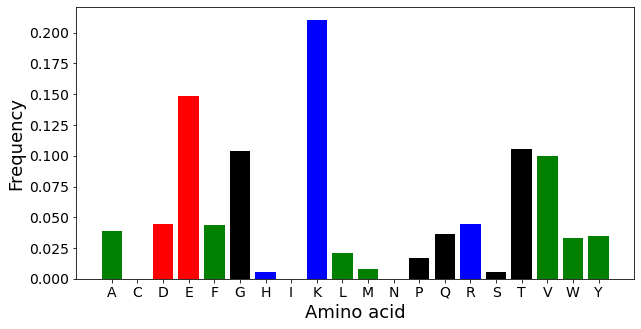

In [43]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A9/ref2015_faelec14_fasol09_A9.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

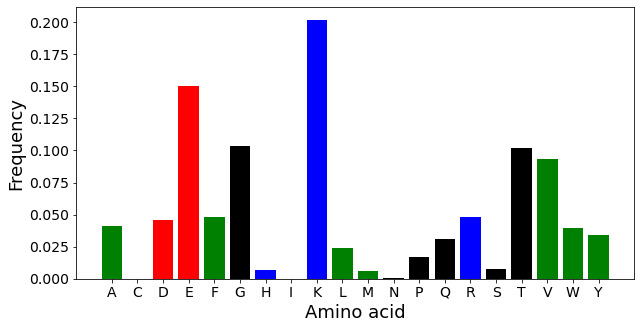

In [44]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A9_HB/ref2015_faelec14_fasol09_A9_HB.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

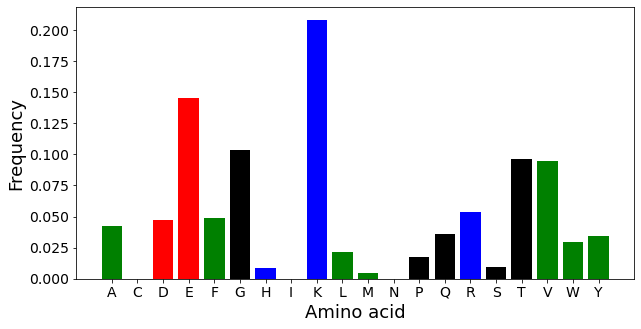

In [45]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A10/ref2015_faelec14_fasol09_A10.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

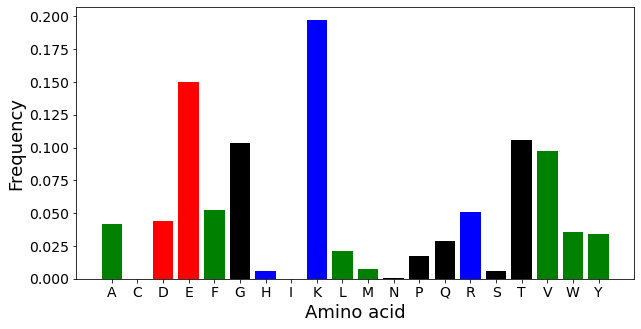

In [41]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A10_HB/ref2015_faelec14_fasol09_A10_HB.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

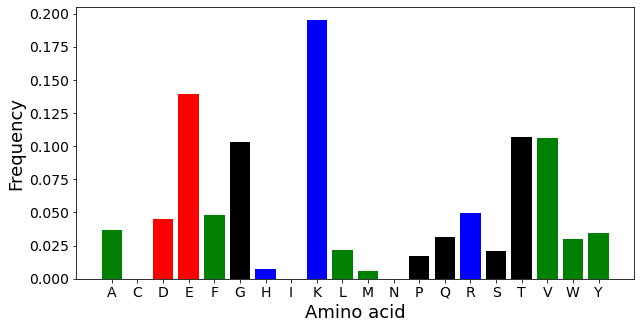

In [58]:

plt.rcParams["figure.figsize"] = [10, 5]
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_AS21/ref2015_faelec14_fasol09_AS21.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

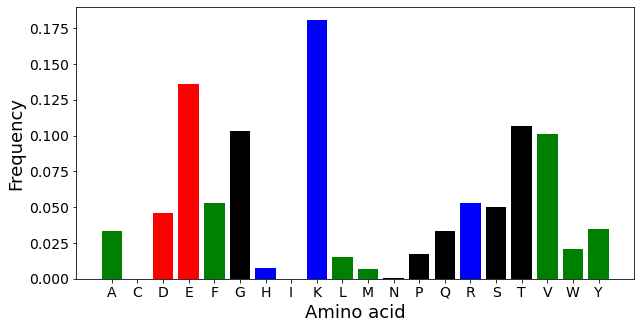

In [55]:
plt.rcParams["figure.figsize"] = [10, 5]
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_AS25/ref2015_faelec14_fasol09_AS25.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

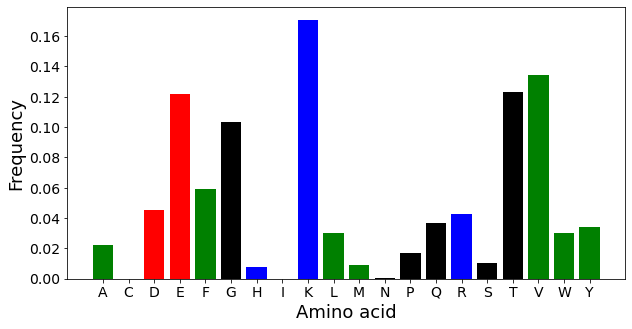

In [49]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol095/ref2015_faelec14_fasol095.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

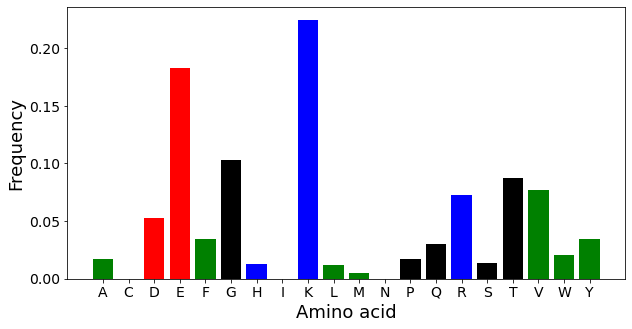

In [50]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085/ref2015_faelec14_fasol085.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [59]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.03689655172413793, 0.0, 0.04517241379310346, 0.1396551724137931, 0.04827586206896552, 0.10344827586206906, 0.007241379310344826, 0.0, 0.19517241379310357, 0.02172413793103449, 0.005862068965517243, 0.0, 0.017241379310344838, 0.03137931034482759, 0.04931034482758622, 0.021034482758620684, 0.10724137931034482, 0.10620689655172418, 0.029655172413793087, 0.034482758620689676]


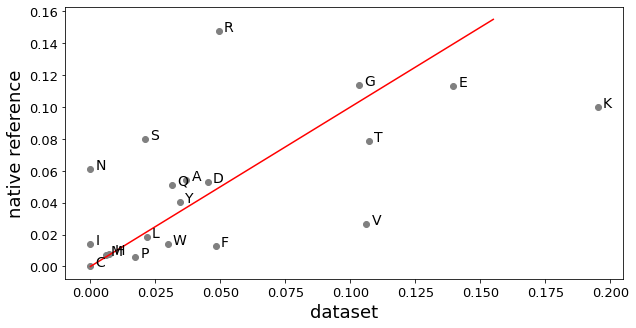

In [60]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('native reference',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

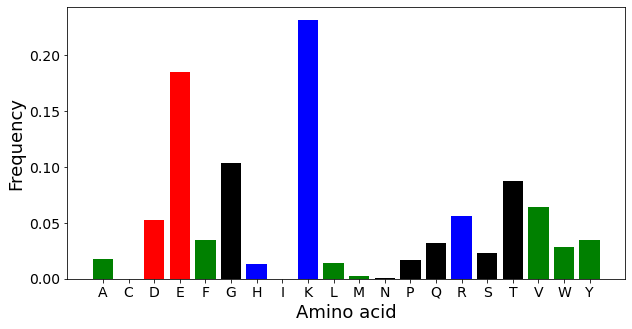

In [90]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085_AS25/ref2015_faelec14_fasol085_AS25.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

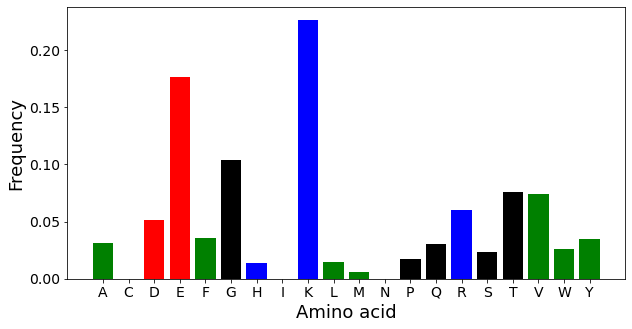

In [49]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085_AS46/ref2015_faelec14_fasol085_AS46.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

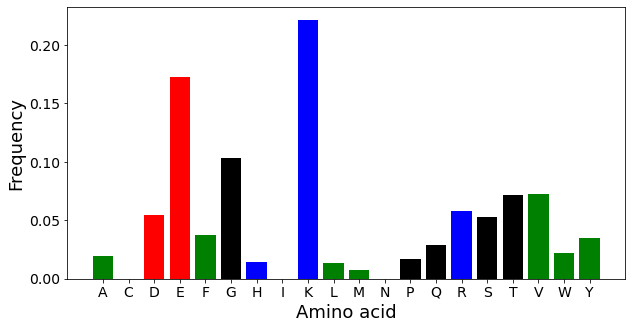

In [50]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085_AS50/ref2015_faelec14_fasol085_AS50.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

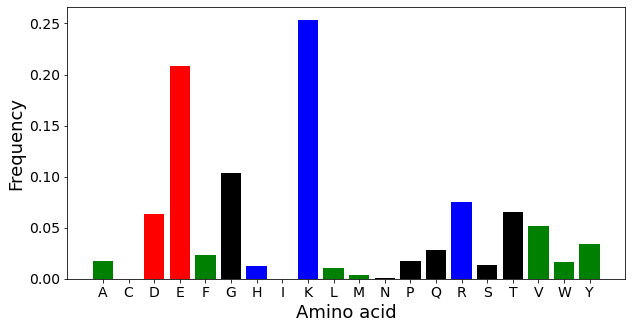

In [54]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol08/ref2015_faelec14_fasol08.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

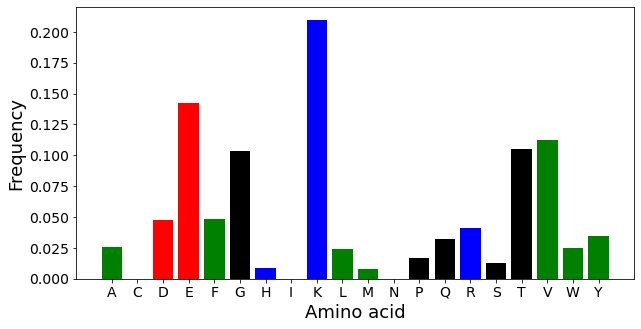

In [55]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec145_fasol095/ref2015_faelec145_fasol095.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

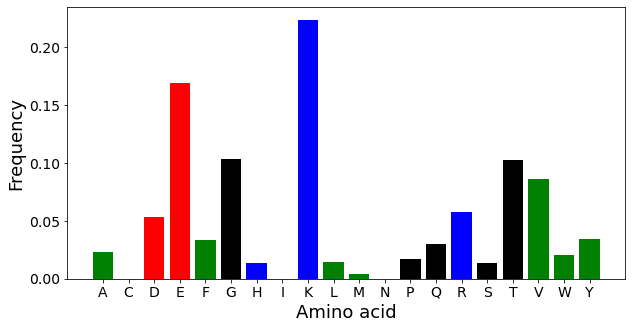

In [56]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec145_fasol09/ref2015_faelec145_fasol09.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

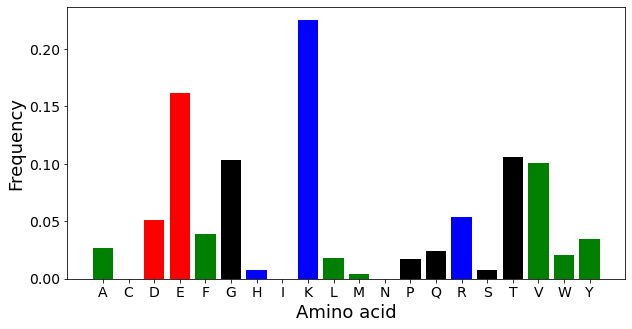

In [57]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec15_fasol095/ref2015_faelec15_fasol095.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [51]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.01931034482758621, 0.0, 0.054137931034482785, 0.17275862068965517, 0.03724137931034482, 0.10344827586206906, 0.014137931034482758, 0.0, 0.22137931034482766, 0.013103448275862064, 0.007241379310344828, 0.0, 0.017241379310344838, 0.0293103448275862, 0.05758620689655174, 0.05275862068965517, 0.0717241379310345, 0.0724137931034483, 0.021724137931034483, 0.034482758620689676]


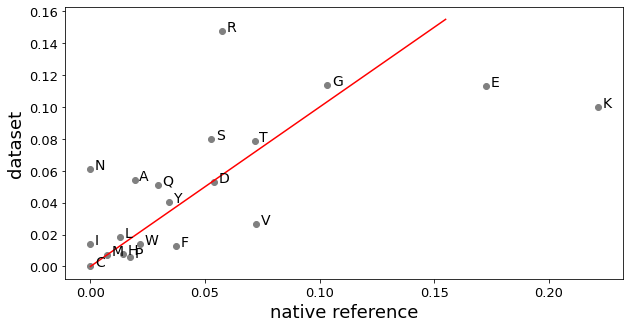

In [52]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('native reference', size=18)
ax.set_ylabel('dataset',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

In [13]:
d = {}

with open("round2_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, dstr_r]
ddesign = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","correlation_native_aa"])
ddesign = ddesign.T

print(ddesign)

                              hydropathy  density_F  density_aro  \
0_input_0069_0003_00010_0001   -2.189655   0.017241     0.086207   
0_input_0069_0003_00010_0002   -1.677586   0.034483     0.120690   
0_input_0069_0003_00010_0003   -1.906897   0.034483     0.086207   
0_input_0069_0003_00010_0004   -1.812069   0.034483     0.120690   
0_input_0069_0003_00010_0005   -1.784483   0.034483     0.086207   
...                                  ...        ...          ...   
9_input_0062_0004_0008_0005    -2.220690   0.017241     0.068966   
9_input_0062_0004_0009_0001    -1.822414   0.068966     0.103448   
9_input_0062_0004_0009_0004    -1.513793   0.034483     0.120690   
9_input_0062_0004_0009_0005    -2.236207   0.034483     0.103448   
9_input_0153_0004_0005_0005    -1.993103   0.017241     0.068966   

                              density_hydrophobics  density_beta_branched  \
0_input_0069_0003_00010_0001              0.103448               0.086207   
0_input_0069_0003_00010_0002 

-1.8836984937134327


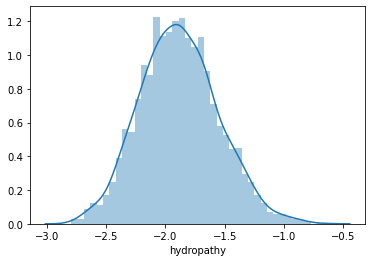

In [9]:
sns.distplot(ddesign["hydropathy"], bins=40)
print(ddesign['hydropathy'].mean())

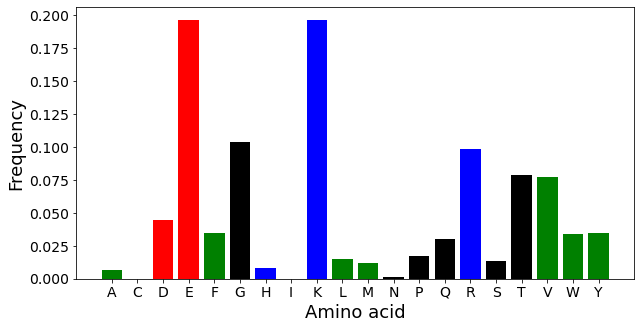

In [60]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("round2_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

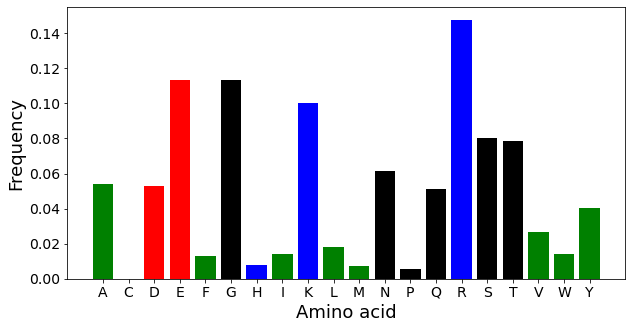

In [61]:
aa_dict_native = {'A': 0.05415794077883519, 'C': 0.0001325451316173157, 'D': 0.05312408875222013, 'E': 0.11335259655912838, 'F': 0.012856877766879623, 'G': 0.11351165071706916, 'H': 0.0076611086074808476, 'I': 0.013890729793494684, 'K': 0.10020411950269066, 'L': 0.018185192057895712, 'M': 0.0071839461336585106, 'N': 0.06120934178087639, 'P': 0.005725949685868038, 'Q': 0.05102987567266654, 'R': 0.14754924051639584, 'S': 0.07997773241788829, 'T': 0.07875831720700899, 'V': 0.026800625613021233, 'W': 0.014182329083052779, 'Y': 0.040505792222251674}
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_native)), list(aa_dict_native.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_native)), list(aa_dict_native.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [62]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.006307315656251378, 0.0, 0.04455233273856385, 0.19612847006099277, 0.034323692546024964, 0.10344827586206569, 0.007821901323706488, 0.0, 0.19593482440488091, 0.015000622432466094, 0.012040610260453603, 0.0010996306900701248, 0.017241379310344248, 0.03009115177669846, 0.09836507738910182, 0.013555195927908603, 0.07858555680042006, 0.07684274589540294, 0.03417845830393999, 0.034482758620688496]


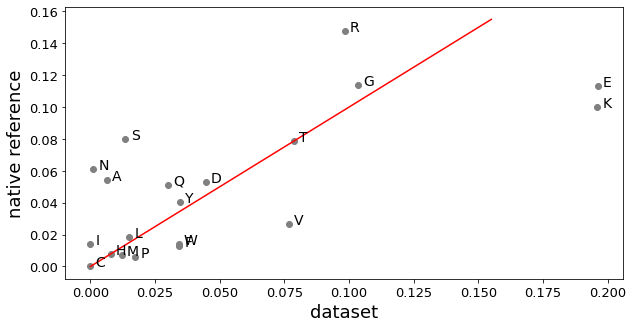

In [63]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('native reference',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

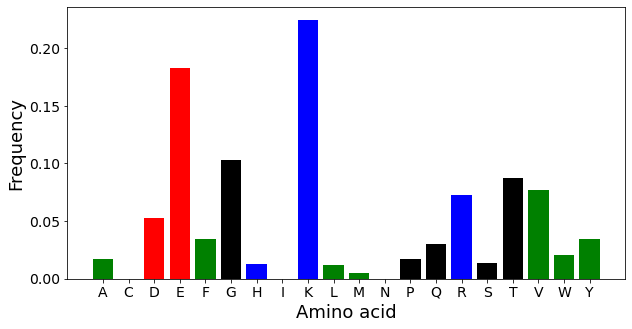

In [64]:
n = 0
distr_test = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085/ref2015_faelec14_fasol085.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr_test = {x: distr_test.get(x, 0) + d.get(x, 0) for x in set(distr_test).union(d)}
        n+=1

distr_test = {x: distr_test.get(x, 0)/n for x in distr_test}
distr_test = dict(sorted(distr_test.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr_test.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr_test)), list(distr_test.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [65]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(distr_test[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.017586206896551725, 0.0, 0.05310344827586211, 0.18310344827586203, 0.034137931034482746, 0.10344827586206906, 0.013103448275862068, 0.0, 0.22448275862068962, 0.012068965517241377, 0.00517241379310345, 0.0, 0.017241379310344838, 0.03034482758620689, 0.07275862068965518, 0.013448275862068966, 0.08758620689655172, 0.07724137931034486, 0.02068965517241379, 0.034482758620689676]
[0.006307315656251378, 0.0, 0.04455233273856385, 0.19612847006099277, 0.034323692546024964, 0.10344827586206569, 0.007821901323706488, 0.0, 0.19593482440488091, 0.015000622432466094, 0.012040610260453603, 0.0010996306900701248, 0.017241379310344248, 0.03009115177669846, 0.09836507738910182, 0.013555195927908603, 0.07858555680042006, 0.07684274589540294, 0.03417845830393999, 0.034482758620688496]


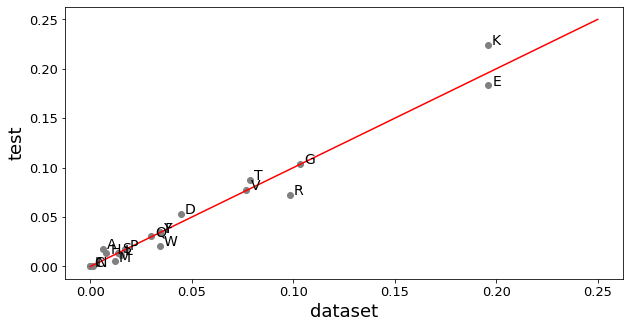

In [66]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('test',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

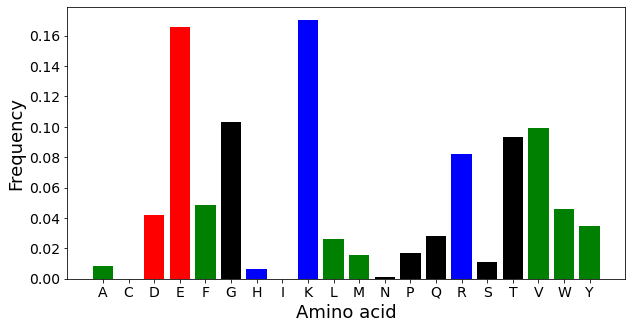

In [80]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("round2_B_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [81]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.008710692316120596, 0.0, 0.04214472427880555, 0.16574576987494266, 0.048754050119743576, 0.10325261790349416, 0.006640631114311315, 0.0, 0.1703906898117068, 0.02631208227025796, 0.01566437616416441, 0.0009782897929156154, 0.017241379310344234, 0.02844866717798549, 0.0821293846948553, 0.010823798268818133, 0.09335623835835453, 0.09928858766259553, 0.045635262259928436, 0.03448275862068847]


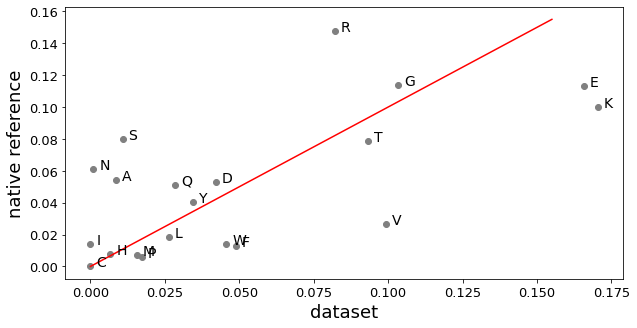

In [82]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('native reference',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

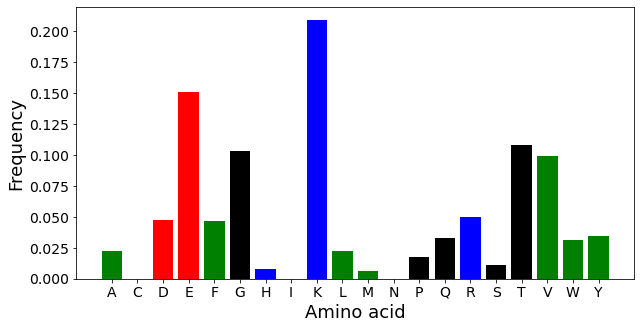

In [83]:
n = 0
distr_test = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09/ref2015_faelec14_fasol09.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr_test = {x: distr_test.get(x, 0) + d.get(x, 0) for x in set(distr_test).union(d)}
        n+=1

distr_test = {x: distr_test.get(x, 0)/n for x in distr_test}
distr_test = dict(sorted(distr_test.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr_test)), list(distr_test.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr_test)), list(distr_test.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [84]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(distr_test[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.022068965517241374, 0.0, 0.04724137931034482, 0.15068965517241378, 0.04689655172413794, 0.10344827586206906, 0.008275862068965517, 0.0, 0.2089655172413792, 0.022068965517241374, 0.006551724137931033, 0.0, 0.017241379310344838, 0.03275862068965518, 0.049655172413793115, 0.011379310344827585, 0.10793103448275869, 0.09931034482758623, 0.031034482758620693, 0.034482758620689676]
[0.008710692316120596, 0.0, 0.04214472427880555, 0.16574576987494266, 0.048754050119743576, 0.10325261790349416, 0.006640631114311315, 0.0, 0.1703906898117068, 0.02631208227025796, 0.01566437616416441, 0.0009782897929156154, 0.017241379310344234, 0.02844866717798549, 0.0821293846948553, 0.010823798268818133, 0.09335623835835453, 0.09928858766259553, 0.045635262259928436, 0.03448275862068847]


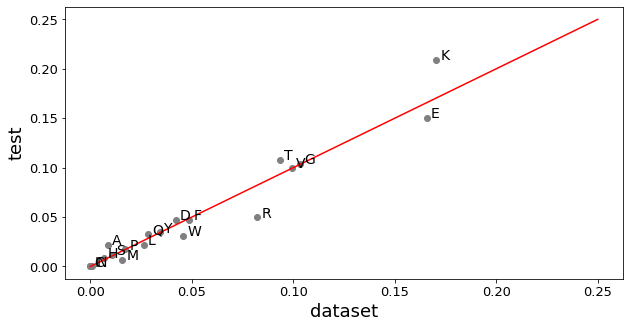

In [85]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('test',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

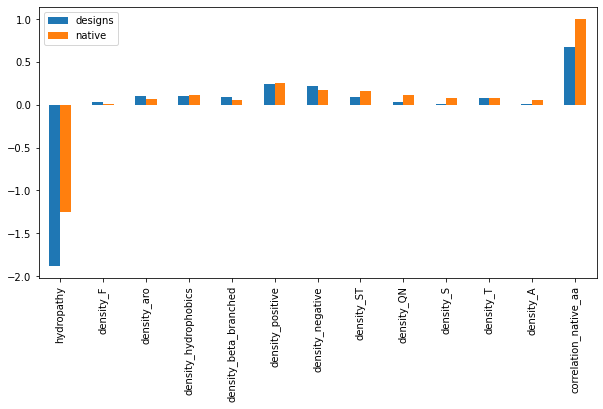

In [36]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("round2_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()


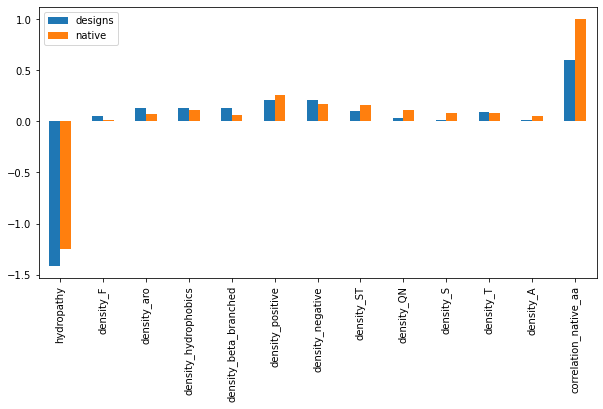

In [40]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("round2_B_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()


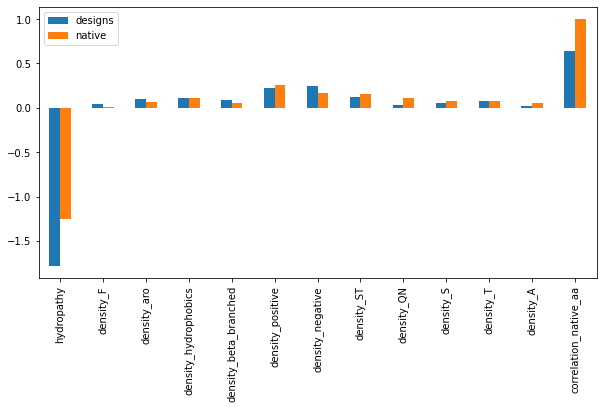

In [61]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("ref2015_faelec14_fasol085_AS50/ref2015_faelec14_fasol085_AS50.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()


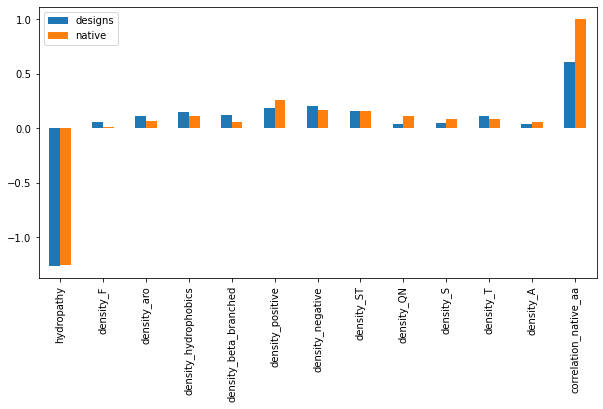

In [62]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("ref2015_faelec14_fasol09_AS25/ref2015_faelec14_fasol09_AS25.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()
